=================================================================================================================================================================================================

    Nama  : Putri Arzalya Maharani
    Batch : HCK-013
    Milestone 2

    Program ini dirancang untuk mengantisipasi kecenderungan nasabah dalam mengambil pinjaman pribadi dari bank (Thera Bank). Dengan menganalisis data demografis, kebiasaan perbankan, dan respon mereka terhadap kampanye pemasaran sebelumnya, program ini menggunakan lima model pembelajaran mesin, yaitu Support Vector Machine (SVM), Decision Trees, Random Forest, K-Nearest Neighbors (KNN), dan Gradient Boosting Classifier. Kemudian menentukan model terbaik yang dapat memprediksi apakah seorang nasabah akan mengambil pinjaman pribadi berdasarkan karakteristik yang ada.
======================================================================================================================================================================================================

## **Introduction**

Bank Thera ingin meningkatkan jumlah nasabah yang mengambil pinjaman pribadi sambil tetap mempertahankan mereka sebagai nasabah deposito. Pada kampanye sebelumnya, bank mencapai tingkat konversi yang baik, dengan lebih dari 9% nasabah yang menerima tawaran pinjaman pribadi. Namun, manajemen bank ingin meningkatkan efisiensi kampanye pemasaran dengan cara yang lebih terarah dan efektif. Mereka ingin merancang strategi pemasaran yang memungkinkan mereka menargetkan nasabah dengan probabilitas tertinggi untuk menerima pinjaman pribadi, dengan menggunakan anggaran yang minimal.

Untuk mencapai tujuan ini, bank memanfaatkan data yang dimilikinya, termasuk informasi demografis pelanggan (seperti usia, pendapatan, dll.), hubungan pelanggan dengan bank (seperti kepemilikan hipotek, rekening surat berharga, dll.), dan respons pelanggan terhadap kampanye pinjaman pribadi sebelumnya.

Dataset ini berisi data 5000 nasabah. Data tersebut mencakup informasi demografis pelanggan (usia, pendapatan, dll.), hubungan pelanggan dengan bank (hipotek, rekening surat berharga, dll.), dan respons pelanggan terhadap kampanye pinjaman pribadi terakhir (Pinjaman Pribadi). Di antara 5000 nasabah ini, hanya 480 (= 9,6%) yang menerima pinjaman pribadi yang ditawarkan kepada mereka pada kampanye sebelumnya.

Tidak ada nilai kosong atau (NaN) dalam kumpulan data. Kumpulan data memiliki campuran atribut numerik dan kategorikal, tetapi semua data kategorikal diwakili dengan angka. Selain itu, beberapa variabel prediktor sangat miring (berekor panjang), menjadikan pra-pemrosesan data sebagai aspek data yang menarik namun tidak terlalu menantang.

**Penjelasan Tiap Kolom**

ID : ID Pelanggan

Age : Usia pelanggan dalam tahun penyelesaian

Experience : Jumlah tahun pengalaman profesional

Income : Pendapatan tahunan pelanggan ($1000)

ZIP Code : Kode Pos Alamat Rumah

Family : Ukuran keluarga pelanggan (Termasuk suami/istri, anak)

CCAvg: Rata-rata. Pengeluaran Kartu Kredit per Bulan ($1000)

Education : Jenjang Pendidikan. 1: Undergraduate; 2: Graduare; 3: Advanced/Professional

Mortgage : Nilai hipotek rumah jika ada ($1000)

Personal Loan : Apakah pelanggan ini menerima pinjaman pribadi yang ditawarkan pada kampanye terakhir?

Securities Account : Apakah nasabah mempunyai rekening surat berharga di bank? {1: Ya, 0: Tidak}

CD Account : Apakah nasabah mempunyai rekening sertifikat deposito (CD) di bank? {1: Ya, 0: Tidak}

Online : Apakah nasabah menggunakan fasilitas internet banking? {1: Ya, 0: Tidak}

Credit Card : Apakah nasabah menggunakan kartu kredit yang diterbitkan oleh Bank ini? {1: Ya, 0: Tidak}

## **Importing Libraries**

In [175]:
# Library for dataframe and manipulation
import numpy as np
import pandas as pd

# Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libaries related to feature engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler

# Libraries for statistic test
from scipy import stats
from scipy.stats import pointbiserialr
from scipy.stats import kendalltau
from scipy.stats import spearmanr

# Model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Saving Model
import pickle

## **Data Loading**

Membuka file dataset

In [156]:
data = pd.read_csv("/Users/putriarzalya/Downloads/Bank_Personal_Loan_Modelling.csv")

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Diketahui jumlah baris sebanyak 5000 dan 14 kolom

In [4]:
data.shape

(5000, 14)

Lalu saya menggunakan data.info untuk melihat kolom yang ada pada dataset ini

In [5]:
# Mengetahui info terkait missing value dan tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Diperoleh tipe data terdapat int64 dan float64 serta tidak terdapat missing value.

## **Exploratory Data Analysis (EDA)**

Melihat outliers dan persebaran statistik dari tiap kolom dengan data.describe

In [6]:
# Menampilkan persebaran statistik data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### **Check Missing Value**

In [7]:
# Mengetahui persentasi missing value dari setiap kolom
percent_missing = (data.isnull().sum() * 100 / len(data)).round(2)
missing_value_data = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_data

,column_name,percent_missing
ID,ID,0.0
Age,Age,0.0
Experience,Experience,0.0
Income,Income,0.0
ZIP Code,ZIP Code,0.0
Family,Family,0.0
CCAvg,CCAvg,0.0
Education,Education,0.0
Mortgage,Mortgage,0.0
Personal Loan,Personal Loan,0.0


Tidak ada missing value di setiap kolom

### **Check Duplicated Data**

In [8]:
# Mengetahui data yang duplikat
data.duplicated().sum()

0

Tidak ada data yang duplikat

### **Check Cardinality**

Mengetahui seberapa banyak nilai unik yang terdapat dalam suatu fitur atau kolom dalam dataset. Fitur yang memiliki kardinalitas tinggi yaitu yang memiliki nilai unik dengan jumlah banyak dan sebaliknya.

In [9]:
# Membuat list untuk menyimpan data
data_list = []

# Menghitung dan menyimpan cardinality untuk setiap kolom
for col in data.columns:
    unique_values = data[col].unique()
    cardinality = len(unique_values)
    unique_sample = unique_values[:5]  # Ambil 5 sampel unik pertama
    data_list.append({'Column Name': col, 'Number of Unique': cardinality, 'Unique Sample': unique_sample})

# Membuat DataFrame dari list
cardinality = pd.DataFrame(data_list)

# Mengurutkan DataFrame berdasarkan kolom "Number of Unique" secara menurun
cardinality_sorted = cardinality.sort_values(by='Number of Unique', ascending=False)

# Menampilkan DataFrame yang sudah diurutkan
print(cardinality_sorted)

           Column Name  Number of Unique                        Unique Sample
0                   ID              5000                      [1, 2, 3, 4, 5]
4             ZIP Code               467  [91107, 90089, 94720, 94112, 91330]
8             Mortgage               347              [0, 155, 104, 134, 111]
3               Income               162                [49, 34, 11, 100, 45]
6                CCAvg               108            [1.6, 1.5, 1.0, 2.7, 0.4]
2           Experience                47                    [1, 19, 15, 9, 8]
1                  Age                45                 [25, 45, 39, 35, 37]
5               Family                 4                         [4, 3, 1, 2]
7            Education                 3                            [1, 2, 3]
9        Personal Loan                 2                               [0, 1]
10  Securities Account                 2                               [1, 0]
11          CD Account                 2                        

### **Visualisasi**

#### Bagaimana Distribusi Data?

- Apakah data memiliki distribusi normal atau tidak?
- Apakah ada pencilan (outliers) dalam data?
- Box plot juga dapat memberikan gambaran tentang distribusi data. Jika data terdistribusi normal, box plot akan menunjukkan bahwa median berada di tengah kotak (IQR) dan garis median box akan sejajar dengan garis tengah box. Outlier juga dapat dilihat pada box plot.

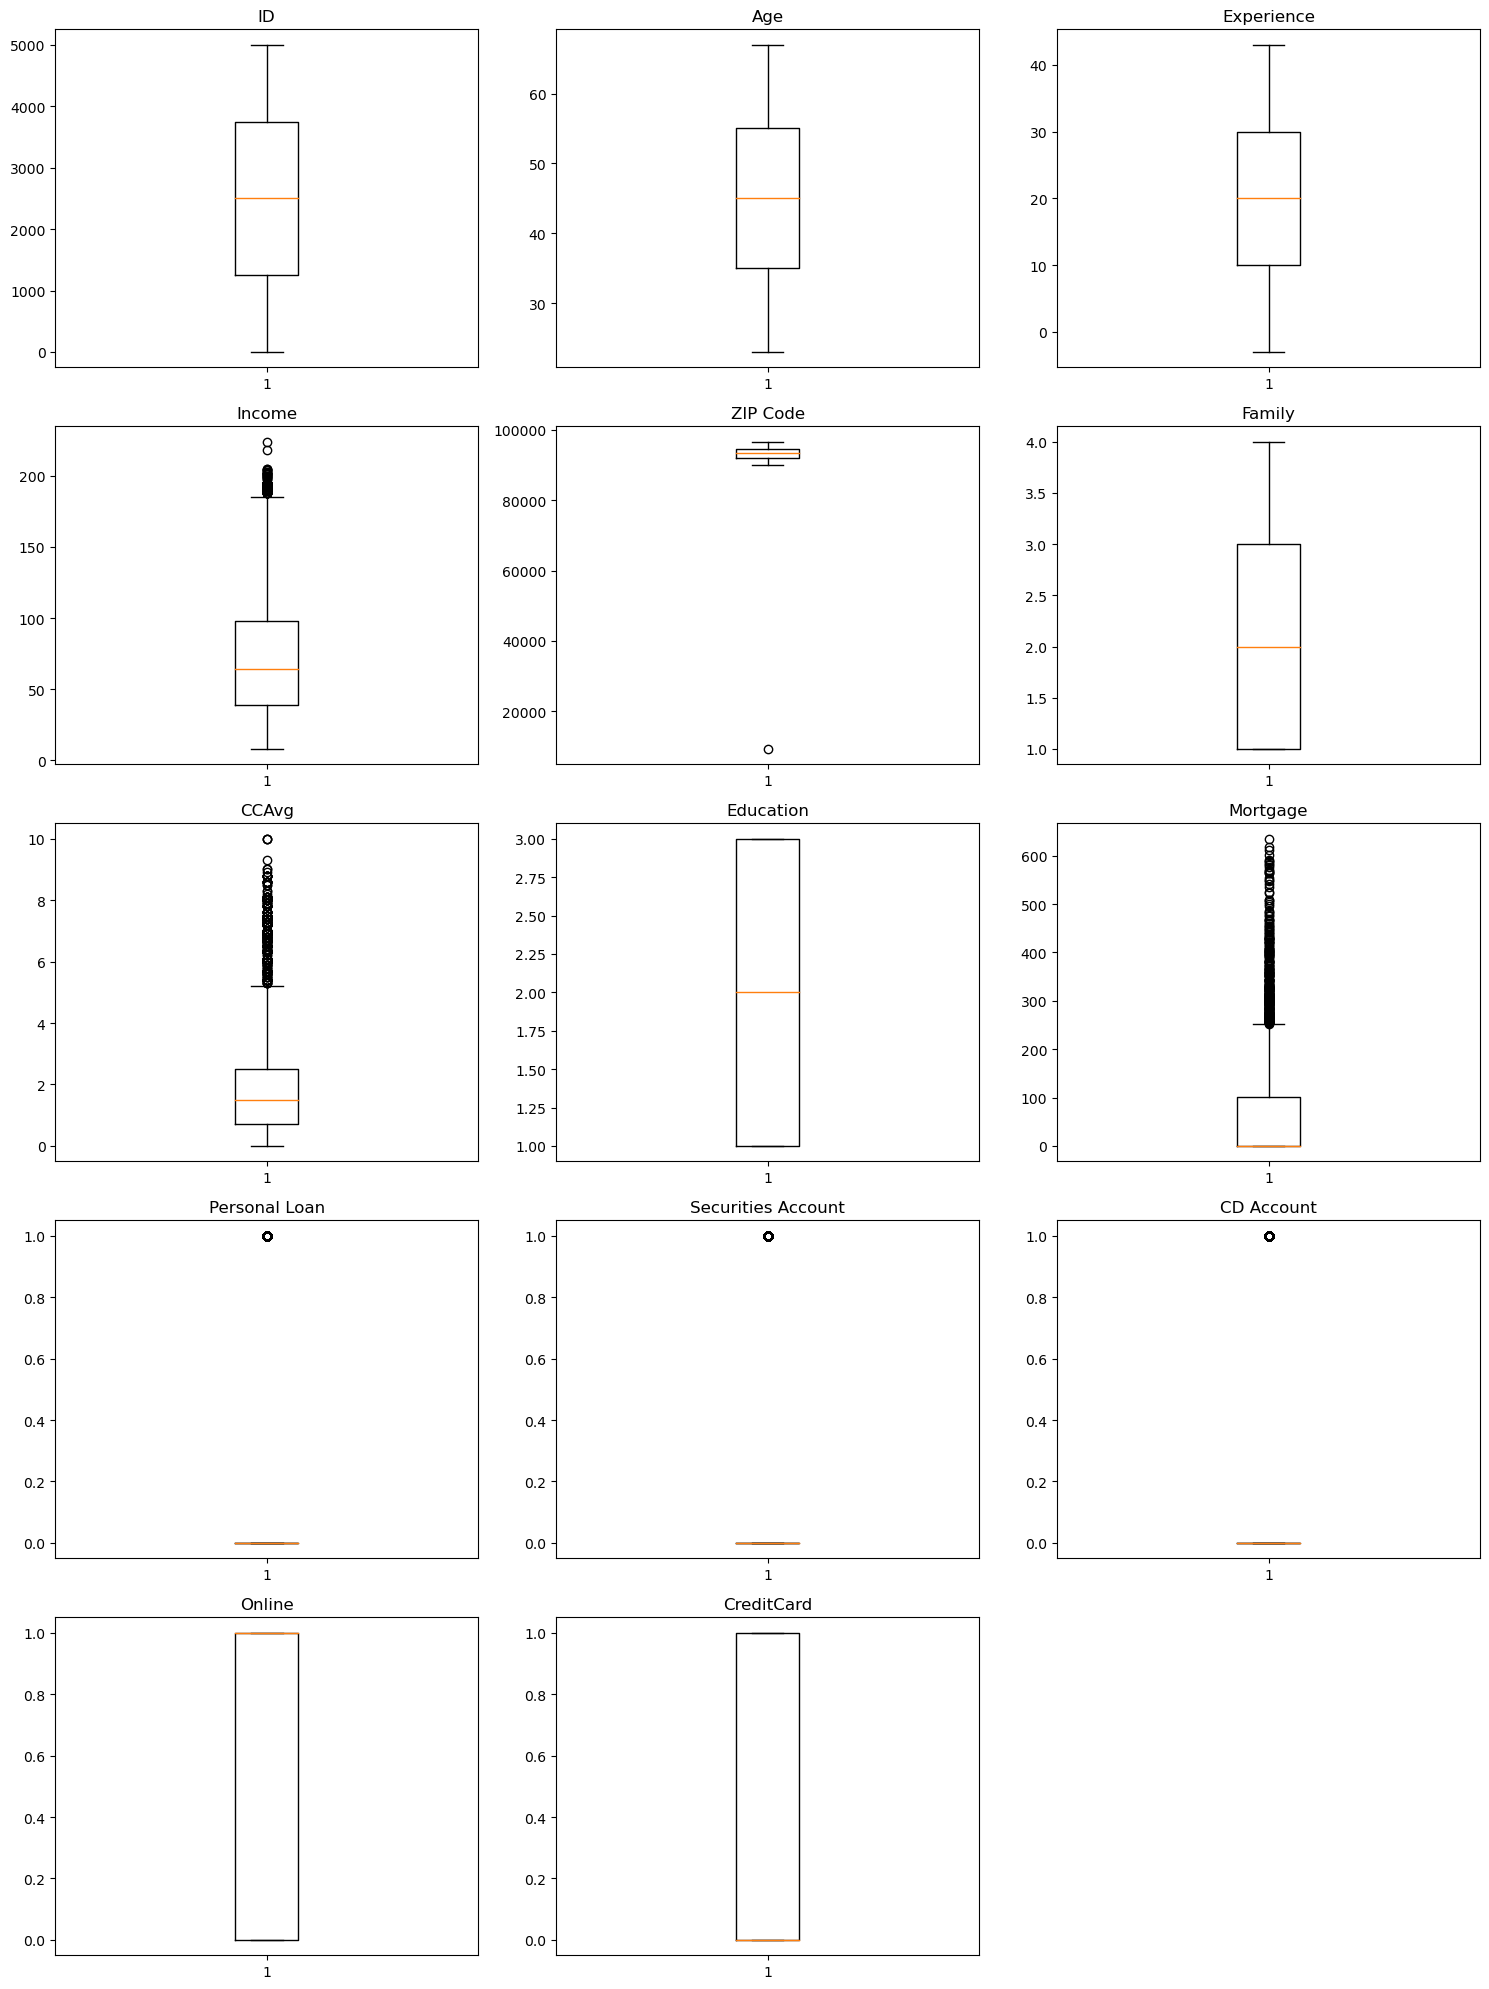

In [164]:
data_num_cols = data.columns[data.dtypes != object]

# numeric column
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
axes = axes.flatten()
# Creating boxplot
for i, column in enumerate(data_num_cols):
   axes[i].boxplot(data[column])
   axes[i].set_title(column)
    
# Removing the unused plots
for j in range(len(data_num_cols), len(axes)):
   axes[j].axis('off')

plt.tight_layout()

plt.show()

Berdasarkan box plot, dapat diketahui bahwa banyak kolom yang memiliki outlier terutama di kolom `Income`, `CCAvg`, `Mortgage`. Beberapa kolom pun terlihat memiliki distribusi miring (skew). Pada kolom `ID`, `Age`, `Experience` menunjukkan tidak adanya outlier dan memiliki distribusi normal. 

**Check Imbalanced Data**

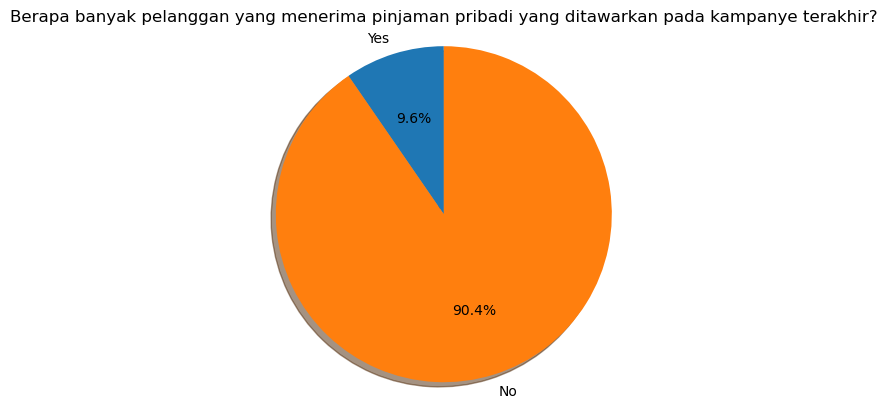

In [158]:
positive_count = data[data['Personal Loan'] == 1].shape[0]
negative_count = data[data['Personal Loan'] == 0].shape[0]

labels = 'Yes', 'No'
sizes = [positive_count, negative_count]
explode = (0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Berapa banyak pelanggan yang menerima pinjaman pribadi yang ditawarkan pada kampanye terakhir?")
plt.show()

Berdasarkan diagram pie, kita dapat melihat bahwa sekitar 9.6% dari total nasabah menerima pinjaman pribadi yang ditawarkan pada kampanye terakhir, sementara 90.4% sisanya tidak menerima pinjaman tersebut. Ini memberikan pemahaman yang jelas tentang efektivitas kampanye pemasaran sebelumnya dalam mendorong konversi pinjaman pribadi. Dengan memahami bahwa hanya sebagian kecil nasabah yang menerima tawaran pinjaman pribadi, manajemen bank dapat melihat kesempatan untuk meningkatkan rasio konversi dalam kampanye pemasaran berikutnya. Strategi pemasaran yang lebih cermat dan target dapat membantu dalam meningkatkan persentase nasabah yang menerima tawaran pinjaman.

**Took personal loan by education**

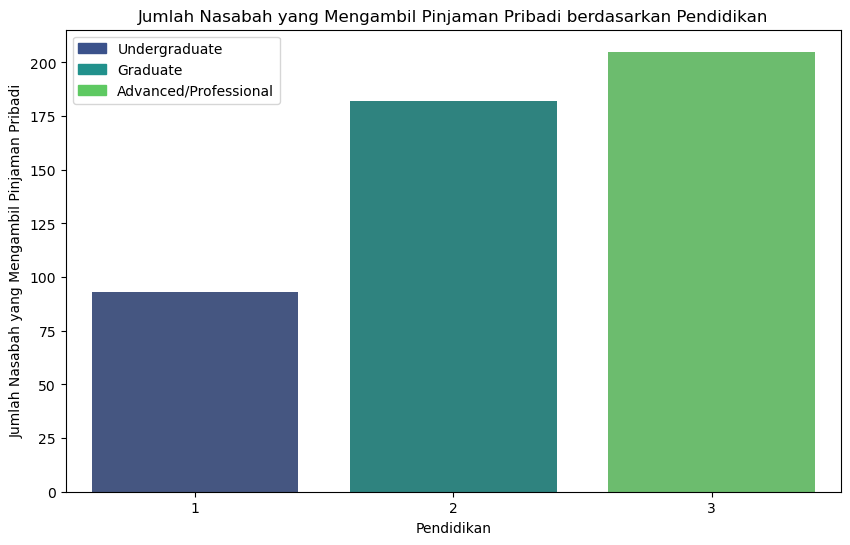

In [189]:
# Group data berdasarkan kolom 'Education' dan hitung jumlah nasabah yang mengambil pinjaman pribadi
loan_by_education = data.groupby('Education')['Personal Loan'].sum().reset_index()

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Personal Loan', data=loan_by_education, palette='viridis')

# Menambahkan label dan judul
plt.xlabel('Pendidikan')
plt.ylabel('Jumlah Nasabah')
plt.title('Jumlah Nasabah yang Mengambil Pinjaman Pribadi berdasarkan Pendidikan')

# Menambahkan legenda
legend_labels = ['Undergraduate', 'Graduate', 'Advanced/Professional']
colors = sns.color_palette('viridis', len(legend_labels))
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(legend_labels))]

# Menampilkan legenda
plt.legend(legend_handles, legend_labels)

# Menampilkan plot
plt.show()

Nasabah dengan tingkat pendidikan 'Advanced/Professional' memiliki jumlah pinjaman pribadi yang paling tinggi, diikuti oleh nasabah dengan tingkat pendidikan 'Graduate' dan 'Undergraduate'. Ini menunjukkan bahwa nasabah dengan tingkat pendidikan yang lebih tinggi cenderung lebih cenderung untuk mengambil pinjaman pribadi. Manajemen bank dapat memanfaatkan informasi ini untuk mengarahkan strategi pemasaran mereka. Misalnya, dapat menargetkan kampanye pemasaran pinjaman pribadi pada nasabah dengan tingkat pendidikan yang lebih tinggi karena cenderung memiliki kecenderungan untuk mengambil pinjaman tersebut.

**Income in a year**

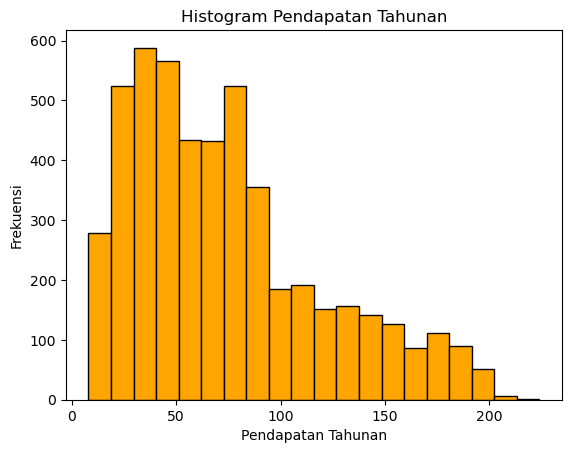

In [165]:
plt.hist(data['Income'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Frekuensi')
plt.title('Histogram Pendapatan Tahunan')
plt.show()

Sumbu x pada histogram mewakili kategori-kategori atau interval-interval pendapatan tahunan, di mana setiap nilai mewakili kelompok tertentu dari pendapatan nasabah. Diketahui pendapatan tahunan nasabah pada Bank Thera berada di interval kurang dari 50 hingga lebih dari 50. Akan tetapi dari interval-interval ini dapat membantu mengidentifikasi seberapa banyak nasabah yang berada dalam setiap kategori pendapatan sehingga apakah mayoritas nasabah berada dalam kategori pendapatan rendah, sedang, atau tinggi. Hal ini dapat memberikan wawasan penting untuk strategi pemasaran dan pengambilan keputusan di bank tersebut.

**Income and CCAvg by Age**

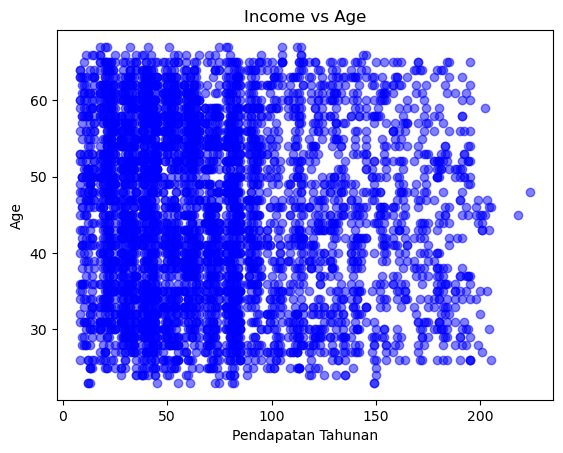

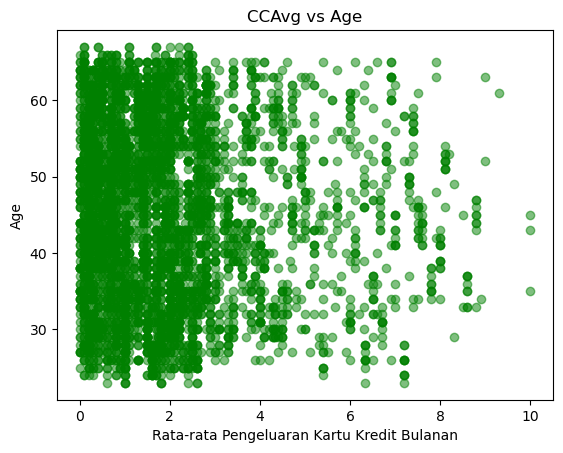

In [171]:
# Scatter plot antara 'income' dan 'age'
plt.scatter(data['Income'], data['Age'], color='blue', alpha=0.5)
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Age')
plt.title('Income vs Age')
plt.show()

# Scatter plot antara 'CCAvg' dan 'age'
plt.scatter(data['CCAvg'], data['Age'], color='green', alpha=0.5)
plt.xlabel('Rata-rata Pengeluaran Kartu Kredit Bulanan')
plt.ylabel('Age')
plt.title('CCAvg vs Age')
plt.show()


Dari analisis histogram pendapatan tahunan, dapat diamati bahwa sebagian besar nasabah memiliki pendapatan tahunan dalam rentang 0 hingga kurang dari 100. Hal yang serupa juga terlihat pada distribusi umur, di mana rentang umur dari kurang dari 30 hingga lebih dari 60 cukup dominan.

Demikian pula, pada histogram CCAvg (rata-rata pengeluaran kartu kredit), rentang umur dari kurang dari 30 hingga lebih dari 60 menunjukkan pola yang serupa dengan distribusi pengeluaran kartu kredit dalam rentang 0-3. Dari pola ini, dapat disimpulkan bahwa sebagian besar nasabah memiliki pengeluaran kartu kredit yang tidak signifikan, terlepas dari rentang umur mereka.

Dari analisis ini, dapat ditarik kesimpulan bahwa tidak ada korelasi yang kuat antara pendapatan tahunan, CCAvg, dan umur nasabah. Meskipun ada variasi dalam pendapatan dan pengeluaran kartu kredit di berbagai rentang umur, namun pola distribusinya tidak menunjukkan ketergantungan yang signifikan terhadap usia nasabah.

**Relation Income and Mortgage**

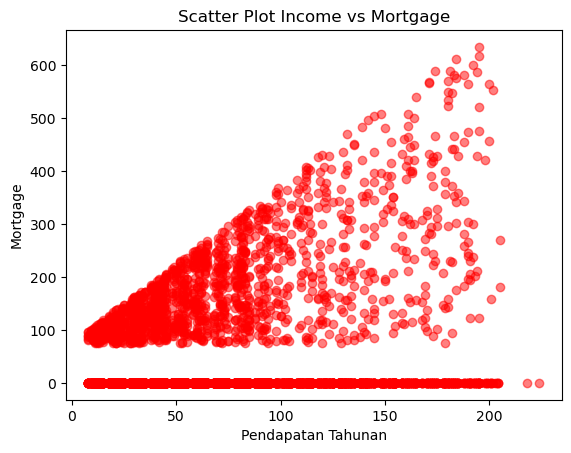

In [163]:
plt.scatter(data['Income'], data['Mortgage'], color='red', alpha=0.5)
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Mortgage')
plt.title('Scatter Plot Income vs Mortgage')
plt.show()

Terdapat titik yang cenderung terkonsentrasi di bagian bawah, hal ini mungkin menunjukkan bahwa sebagian besar nasabah dengan pendapatan rendah memiliki hipotek yang lebih tinggi, sementara nasabah dengan pendapatan tinggi mungkin memiliki hipotek yang lebih rendah. Tetapi walaupun terdapat titik yang cenderung terkonsentrasi kebawah, titik yang linier (berbanding lurus) pun tetap ada yang artinya pun sebagian dari nasabah memiliki pendapatan yang rendah dengan hipotek yang rendah, begitu juga sebaliknya. Dari plot ini dapat diperoleh informasi mengenai segmentasi pasar seperti bank dapat menargetkan penawaran produk hipotek khusus untuk nasabah dengan pendapatan tinggi yang cenderung memiliki hipotek yang lebih rendah.

**Comparison of Income & CCAvg by Personal Loan**

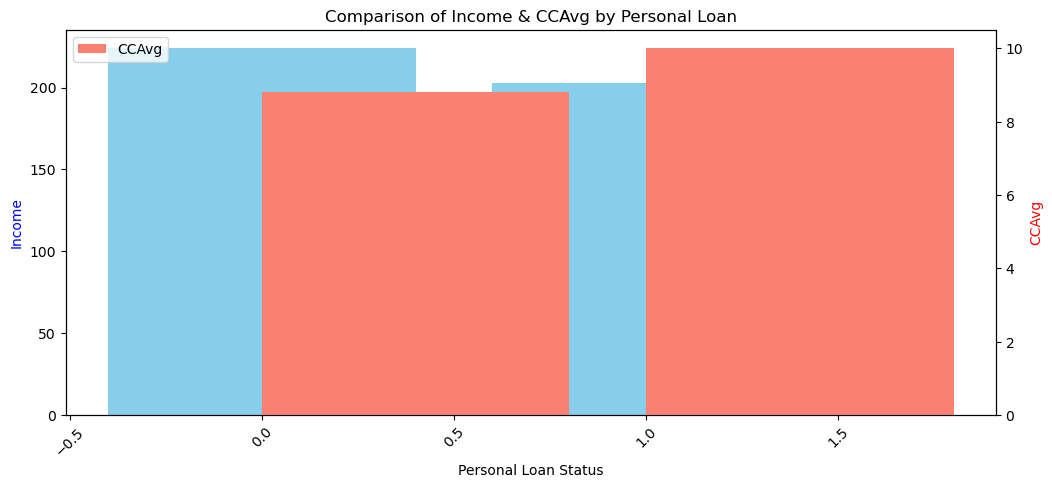

In [172]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.bar(data['Personal Loan'], data['Income'], color='skyblue', align='center', label='Income')
ax1.set_ylabel('Income', color='blue')
plt.xticks(rotation=45)
plt.xlabel('Personal Loan Status')
ax2 = ax1.twinx()
ax2.bar(data['Personal Loan'], data['CCAvg'], color='salmon', align='edge', label='CCAvg')
ax2.set_ylabel('CCAvg', color='red')
plt.title('Comparison of Income & CCAvg by Personal Loan')
plt.legend()
plt.show()

Grafik ini untuk membandingkan bagaimana pendapatan dan pengeluaran kartu kredit rata-rata bulanan (CCAvg) bervariasi antara nasabah yang meminjam (1) dan yang tidak (0). Hal ini dapat memberikan wawasan tentang karakteristik finansial nasabah di kedua kelompok tersebut. Dapat dilihat bahwa nasabah yang memiliki income lebih tinggi maka mereka tidak menerima tawaran pinjaman pribadi sedangkan pada nasabah yang rata-rata pengeluaran kartu kredit per bulan nya lebih tinggi maka mereka menerima tawaran pinjaman pribadi. Walaupun persentase yang menerima tawaran pinjaman tersebut kurang lebih 9% berarti dapat dipastikan isi dari 9% tersebut kebanyakan nasabah yang memiliki rata-rata pengeluaran kartu kreditnya tinggi.

**Check Correlation**

Text(0.5, 1.0, 'Correlation Heatmap')

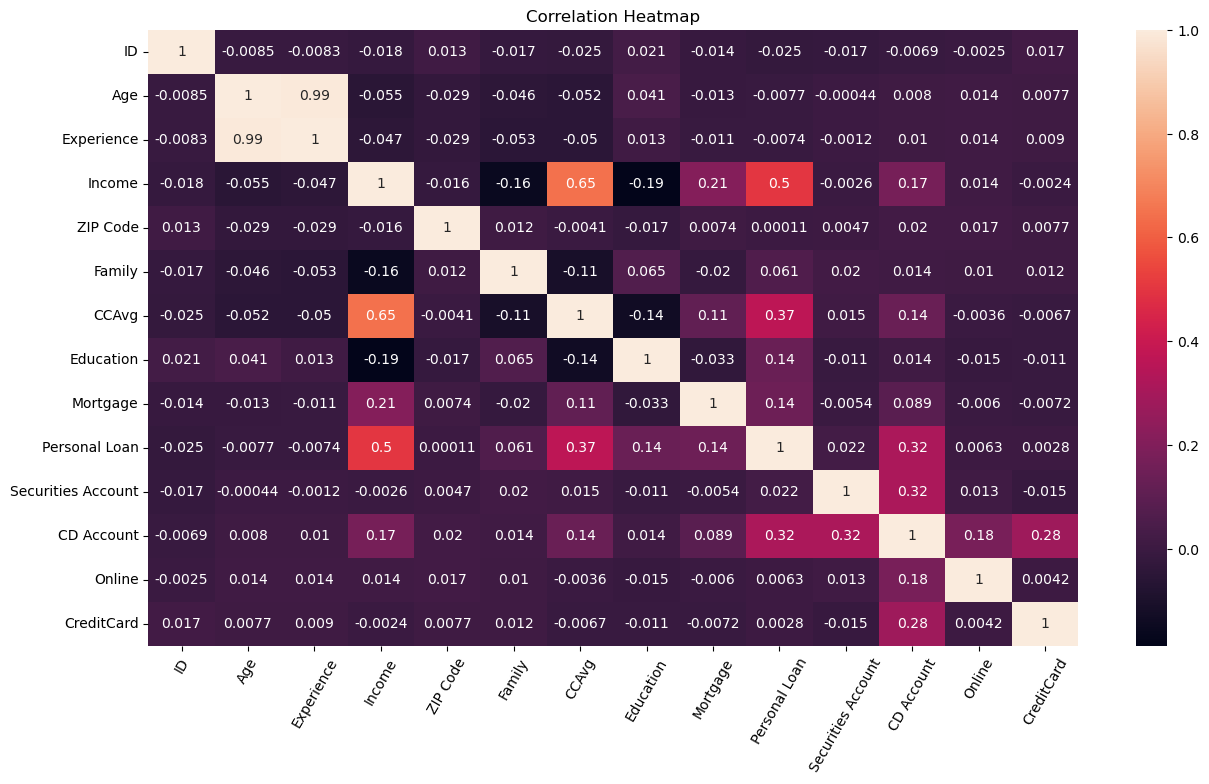

In [161]:
# Membuat heatmap untuk mengecek kolom yang berkorelasi
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')

Pada heatmap dapat diperoleh bahwa korelasi antar kolom terbilang lemah dimana rata-rata nilai korelasi terhadap antar kolom dibawah 0.2. Terdapat beberapa kolom yang memiliki korelasi terbilang kuat yaitu kolom `Age` dengan `Experience`.

### Data Splitting

Pada bagian ini akan dilakukan membagi data menjadi train, test

In [10]:
df = data.copy()

In [11]:
# Membagi data untuk data inference
data_inf = df.sample(1, random_state=42)

# Hapus data inference pada dataframe utama
df.drop(data_inf.index, inplace=True)

# Reset the index of the main data and inference data
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Delete the target from the inference data
data_inf.drop(['Personal Loan'], axis=1, inplace=True)

In [12]:
# Membagi menjadi X dan y
X = df.drop(columns=['Personal Loan', 'ID'], axis=1) #feature
y = df['Personal Loan'] #target

# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=2024)

# Check the size
print(f'Train set : {X_train.shape}')
print(f'test set : {X_test.shape}')

Train set : (3999, 12)
test set : (1000, 12)


Proses split data telah terbagi menjadi 3999 baris dan 12 fitur di train set & 1000 baris dan 12 fitur di test set

### Missing Value Check

Mengetahui missing value pada data y_train dan y_test

In [13]:
# Check missing value y_train
print("Jumlah missing value pada y_train: ", y_train.isnull().sum())

# Menghitung persentase nilai yang hilang dalam setiap kolom
total_entries = len(df)
missing_percentage = (y_train.isnull().sum() / total_entries) * 100
print("Persentase missing value y_train: ", missing_percentage)

# Check missing value y_test
print("Jumlah missing value pada y_test: ", y_test.isnull().sum())

# Menghitung persentase nilai yang hilang dalam setiap kolom
total_entries = len(df)
missing_percentage = (y_test.isnull().sum() / total_entries) * 100
print("Persentase missing value y_test: ", missing_percentage)

Jumlah missing value pada y_train:  0
Persentase missing value y_train:  0.0
Jumlah missing value pada y_test:  0
Persentase missing value y_test:  0.0


### Outlier Handling

In [14]:
# Membuat variabel kolom numerik
num_cols = ['Age', 'Experience', 'Income',
       'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 
       'Securities Account', 'CD Account', 'Online', 'CreditCard']

Membuat plot sebelum membuang outlier

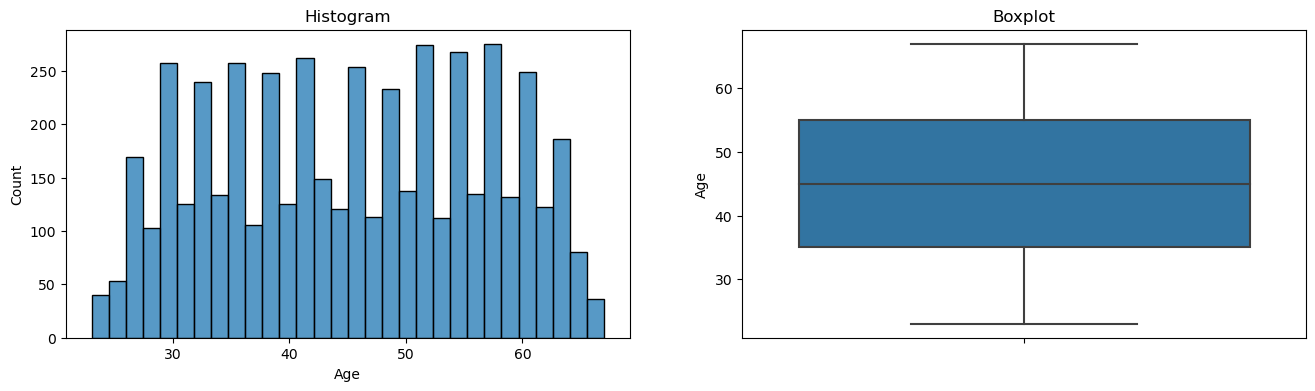

<Figure size 1600x400 with 0 Axes>

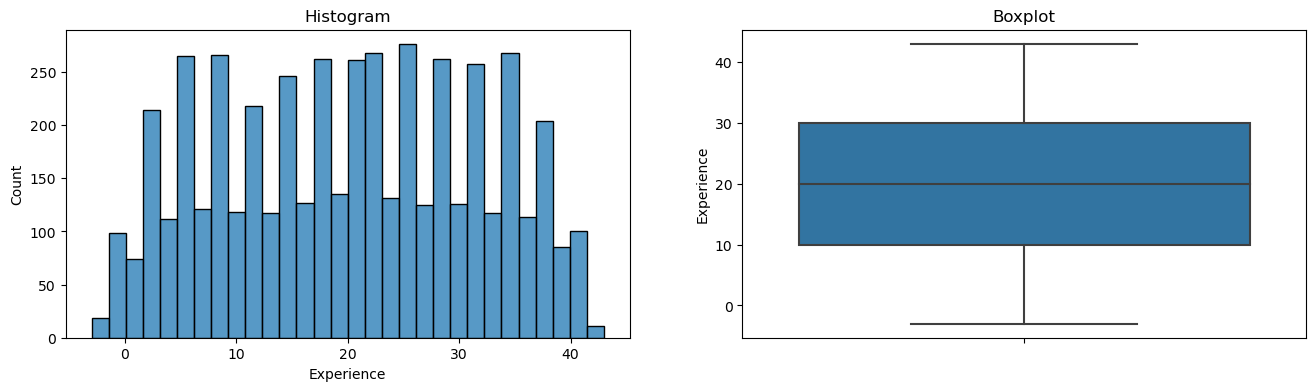

<Figure size 1600x400 with 0 Axes>

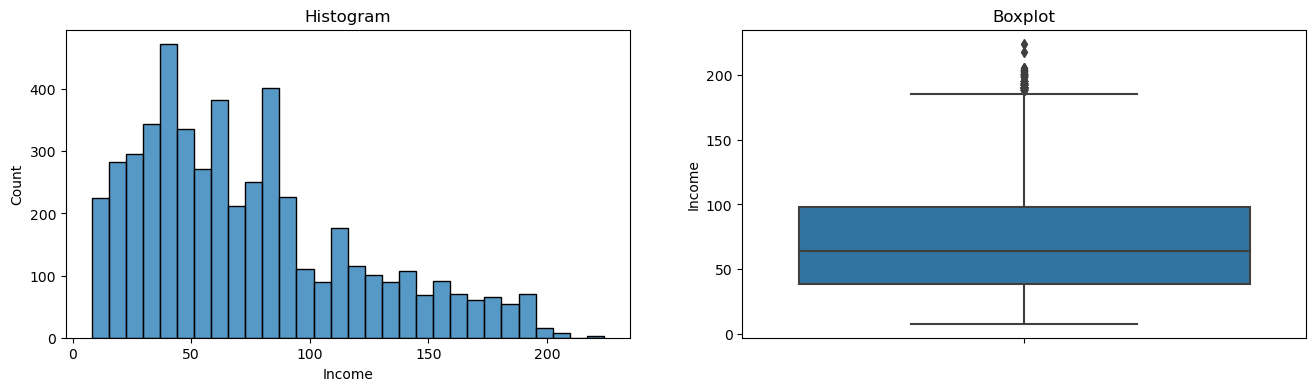

<Figure size 1600x400 with 0 Axes>

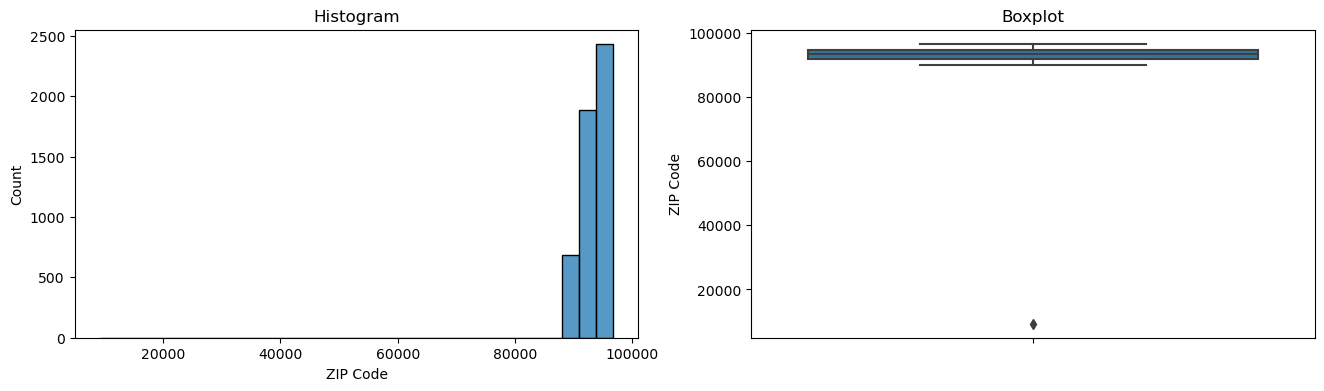

<Figure size 1600x400 with 0 Axes>

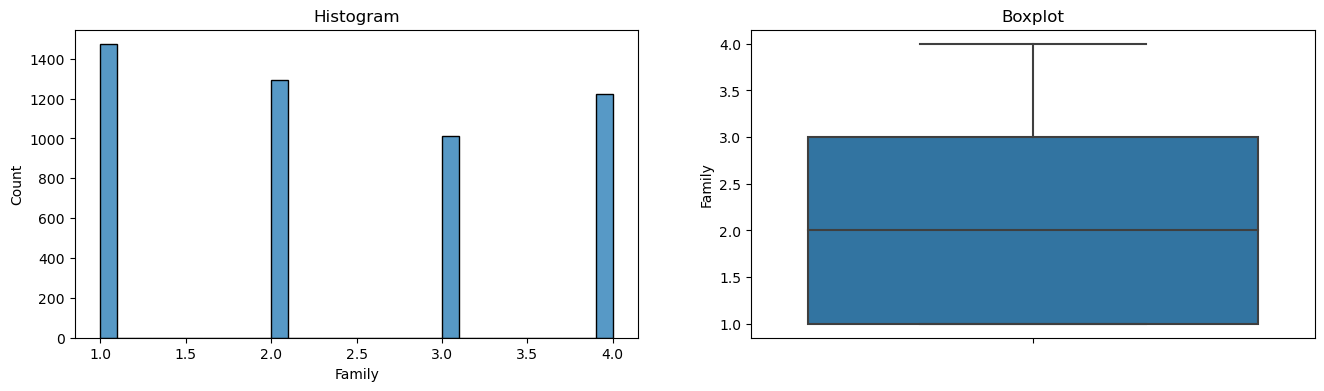

<Figure size 1600x400 with 0 Axes>

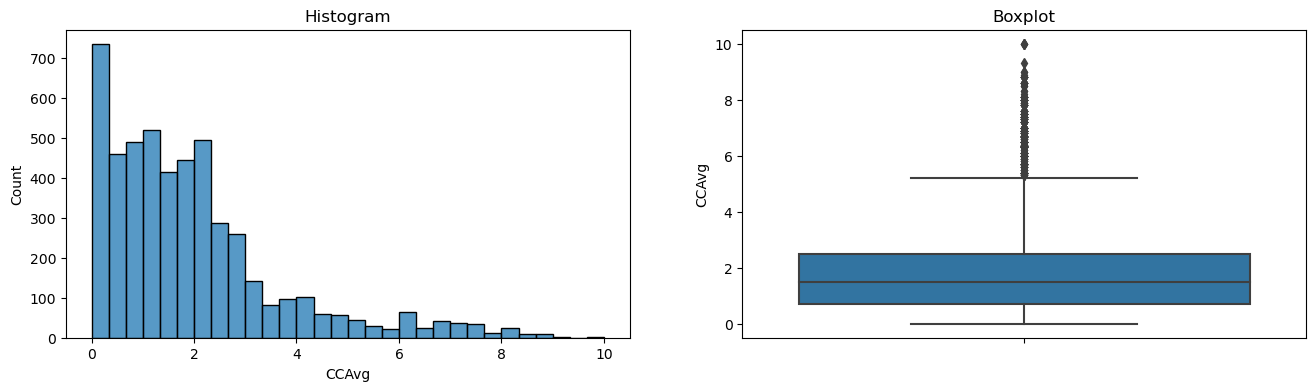

<Figure size 1600x400 with 0 Axes>

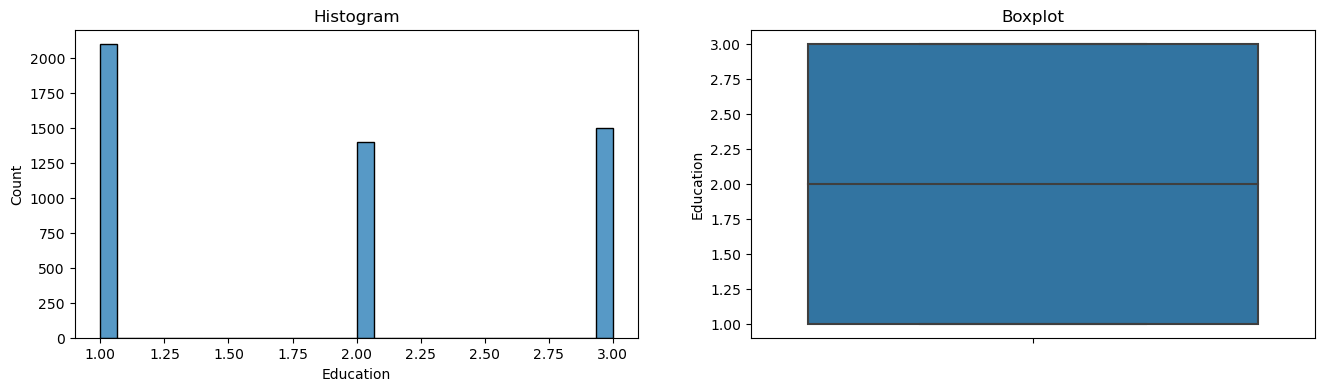

<Figure size 1600x400 with 0 Axes>

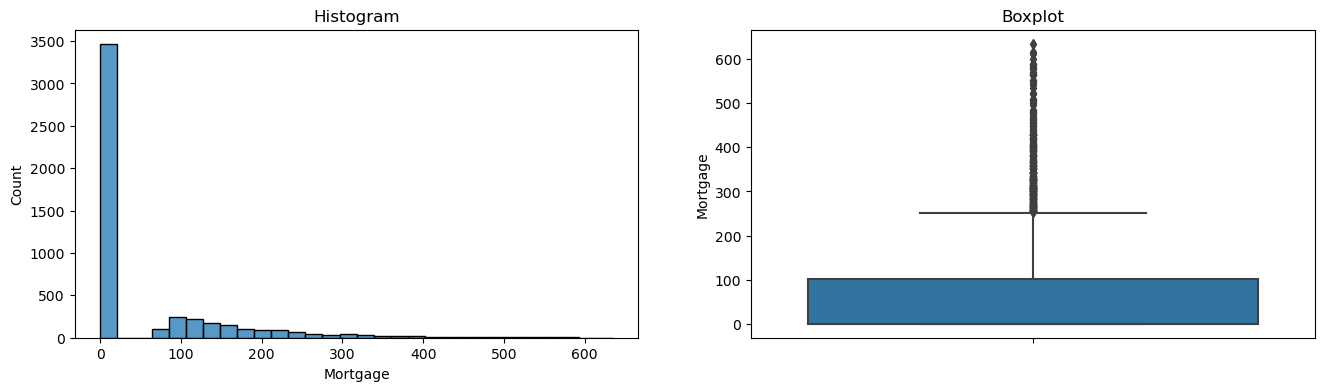

<Figure size 1600x400 with 0 Axes>

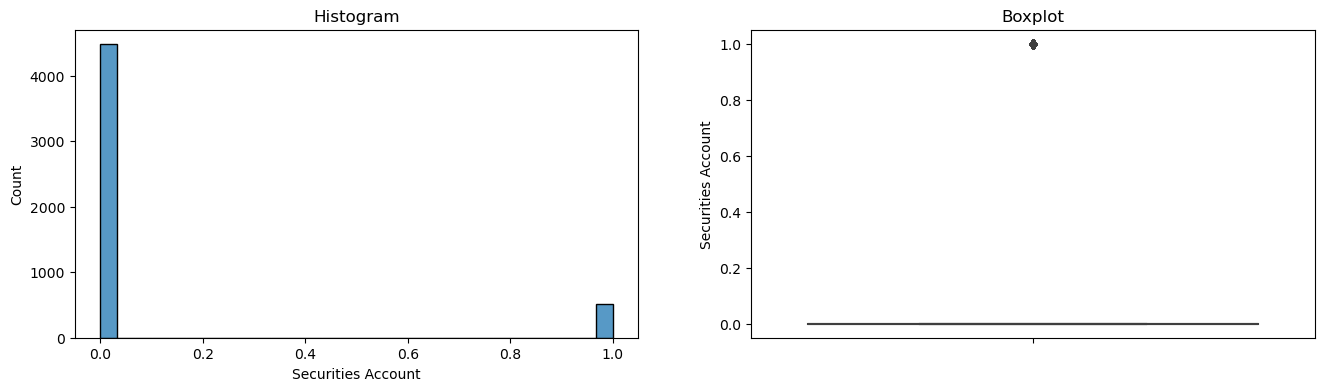

<Figure size 1600x400 with 0 Axes>

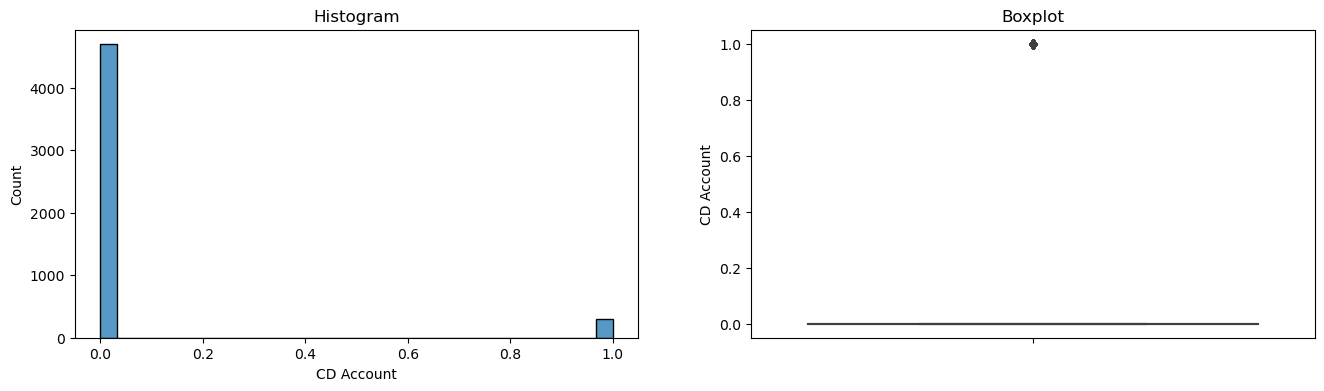

<Figure size 1600x400 with 0 Axes>

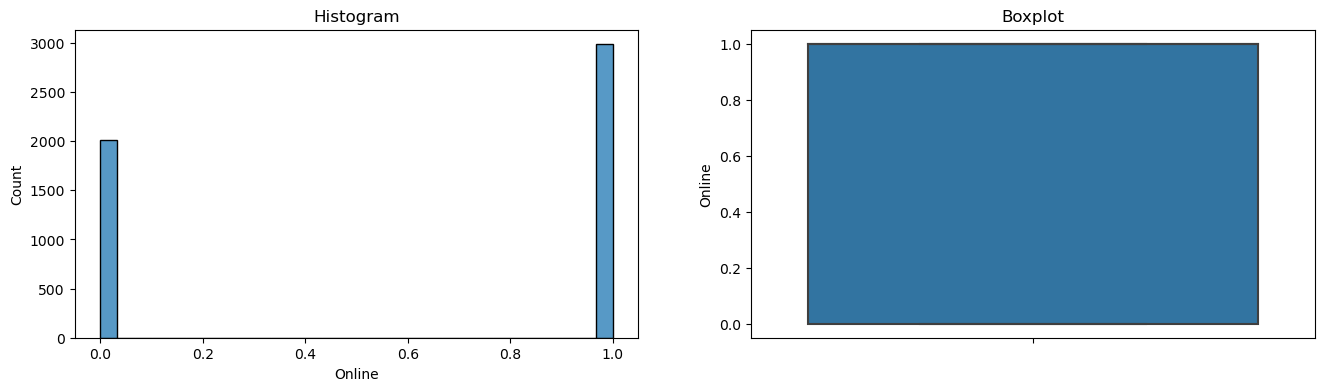

<Figure size 1600x400 with 0 Axes>

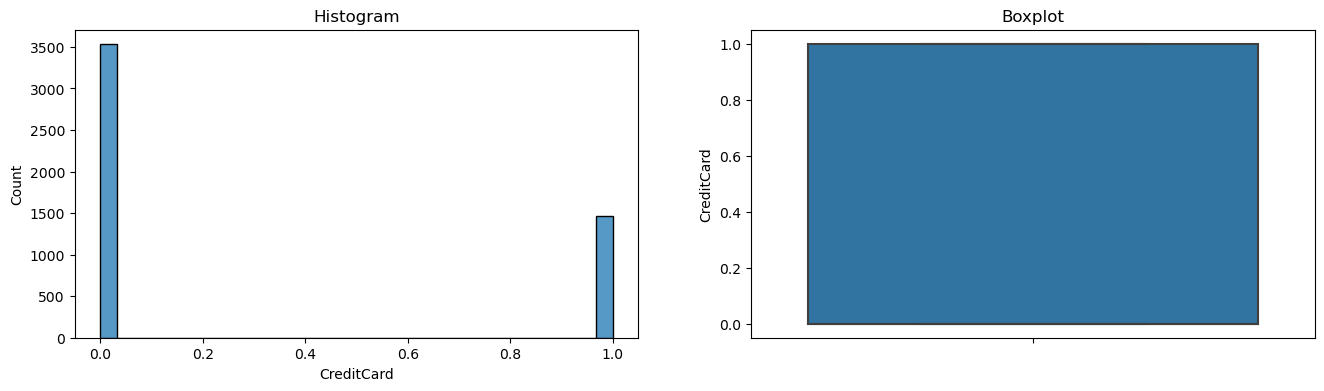

<Figure size 1600x400 with 0 Axes>

In [190]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

for kolom in num_cols:
    # Panggil fungsi diagnostic_plots untuk membuat boxplot dan histogram untuk kolom saat ini
    diagnostic_plots(df, kolom)
    # Define figure size
    plt.figure(figsize=(16,4))

- Untuk menghilangkan outlier, dihitung skewness pada tiap kolom, kemudian hasil dari skewness digolongkan apakah termasuk distribusi normal atau tidak.
- Hasilnya diperoleh list kolom yang memiliki distribusi normal dan distribusi miring(skewed).

In [15]:
# Inisialisasi list untuk menyimpan kolom dengan distribusi normal dan skewed
distribution_normal = []
distribution_skewed = []
upper_boundaries = []
lower_boundaries = []
has_outliers = []
skewness_values = []  # Menyimpan nilai skewness

# Iterasi melalui kolom-kolom numerikal
for kolom in num_cols:
    # Hitung skewness dari kolom saat ini
    skewness = X_train[kolom].skew()
    skewness_values.append(skewness)  # Menyimpan nilai skewness

    # Tambahkan kolom ke list yang sesuai dengan distribusi skewnessnya
    if -0.5 <= skewness <= 0.5:
        distribution_normal.append(kolom)
    else:
        distribution_skewed.append(kolom)

    # Tentukan batas atas dan batas bawah berdasarkan skewness
    if skewness > 1 or skewness < -1:
        IQR = X_train[kolom].quantile(0.75) - X_train[kolom].quantile(0.25)
        lower_boundary = X_train[kolom].quantile(0.25) - (IQR * 3)
        upper_boundary = X_train[kolom].quantile(0.75) + (IQR * 3)
    elif 0.5 <= skewness <= -0.5:
        IQR = X_train[kolom].quantile(0.75) - X_train[kolom].quantile(0.25)
        lower_boundary = X_train[kolom].quantile(0.25) - (IQR * 1.5)
        upper_boundary = X_train[kolom].quantile(0.75) + (IQR * 1.5)
    else:
        std = X_train[kolom].quantile(0.75) - X_train[kolom].quantile(0.25)
        lower_boundary = X_train[kolom].mean() - (std * 3)
        upper_boundary = X_train[kolom].mean() + (std * 3)
    
    # Tambahkan upper dan lower boundaries ke list
    upper_boundaries.append(upper_boundary)
    lower_boundaries.append(lower_boundary)

    # Check for outliers
    outliers = (X_train[kolom] < lower_boundary) | (X_train[kolom] > upper_boundary)
    has_outliers.append(any(outliers))

# Buat DataFrame dari hasilnya
df_result = pd.DataFrame({
    'Kolom': num_cols,
    'Distribusi': ['Normal' if kolom in distribution_normal else 'Skewed' for kolom in num_cols],
    'Skewness': skewness_values,  # Menambahkan nilai skewness
    'Upper Boundary': upper_boundaries,
    'Lower Boundary': lower_boundaries,
    'Has Outliers': has_outliers  # Menambahkan informasi outlier ke DataFrame
})

# Print DataFrame
print(df_result)

                 Kolom Distribusi   Skewness  Upper Boundary  Lower Boundary  \
0                  Age     Normal  -0.013219      105.220055      -14.779945   
1           Experience     Normal  -0.014213       79.997749      -40.002251   
2               Income     Skewed   0.839468      253.951238     -106.048762   
3             ZIP Code     Skewed -13.988924   102702.000000    83816.000000   
4               Family     Normal   0.164102        8.394599       -3.605401   
5                CCAvg     Skewed   1.603614        8.100000       -4.850000   
6            Education     Normal   0.245544        7.871718       -4.128282   
7             Mortgage     Skewed   2.117242      408.000000     -306.000000   
8   Securities Account     Skewed   2.671843        0.000000        0.000000   
9           CD Account     Skewed   3.696991        0.000000        0.000000   
10              Online     Normal  -0.389941        3.595649       -2.404351   
11          CreditCard     Skewed   0.91

Informasi yang diperoleh:
- Terdapat 5 kolom yang memiliki outlier
- dan 7 kolom sisanya tidak memiliki outlier

Berdasarkan informasi tersebut, kolom `Securities Account` dan `CD Account` memiliki variansi yang rendah sehingga metode yang digunakan tidak lagi IQR melainkan Gaussian.

In [16]:
# Inisialisasi list untuk menyimpan kolom dengan distribusi normal dan skewed
distribution_normal = []
distribution_skewed = []

# Iterasi melalui kolom-kolom numerikal
for kolom in num_cols:
    # Hitung skewness dari kolom saat ini
    skewness = X_train[kolom].skew()
    
    # Tambahkan kolom ke list yang sesuai dengan distribusi skewnessnya
    if -0.5 <= skewness <= 0.5:
        distribution_normal.append(kolom)
    else:
        distribution_skewed.append(kolom)

# Print kolom dengan distribusi normal dan skewed
print("Kolom dengan distribusi normal:")
print(distribution_normal)
print("\nKolom dengan distribusi skewed:")
print(distribution_skewed)

Kolom dengan distribusi normal:
['Age', 'Experience', 'Family', 'Education', 'Online']

Kolom dengan distribusi skewed:
['Income', 'ZIP Code', 'CCAvg', 'Mortgage', 'Securities Account', 'CD Account', 'CreditCard']


In [17]:
def detect_skew(df, parameter, fold=1.5):

    for i in parameter:

        IQR = df[parameter].quantile(0.75) - df[parameter].quantile(0.25)
        upper = df[parameter].quantile(0.75) + (fold*IQR)
        bottom = df[parameter].quantile(0.25) - (fold*IQR)

        upper_count = df[
            (df[parameter] > upper)
        ][parameter].count()

        bottom_count = df[
            (df[parameter] < bottom)
        ][parameter].count()

        total_count = upper_count + bottom_count
        percentage = (total_count/len(df[parameter])*100).round(2)

        a = ({'Column': parameter, 'Total Outliers': total_count,
             'Percentage': percentage})
    return print(a)

for i in distribution_skewed:
    detect_skew(df, parameter=i)

{'Column': 'Income', 'Total Outliers': 96, 'Percentage': 1.92}
{'Column': 'ZIP Code', 'Total Outliers': 1, 'Percentage': 0.02}
{'Column': 'CCAvg', 'Total Outliers': 324, 'Percentage': 6.48}
{'Column': 'Mortgage', 'Total Outliers': 291, 'Percentage': 5.82}
{'Column': 'Securities Account', 'Total Outliers': 521, 'Percentage': 10.42}
{'Column': 'CD Account', 'Total Outliers': 302, 'Percentage': 6.04}
{'Column': 'CreditCard', 'Total Outliers': 0, 'Percentage': 0.0}


In [18]:
# Hasil yang telah diperoleh berdasarkan distribution normal dan skewed serta yang memiliki variansi rendah
skew = ['Income', 'ZIP Code', 'CCAvg', 'Mortgage', 'CreditCard']
normal = ['Age', 'Experience', 'Family', 'Education', 'Online', 'Securities Account', 'CD Account']

# Capping distribusi miring dengan metode IQR
winsoriser_fare = Winsorizer(capping_method='iqr', 
                               tail='both', 
                               fold=3, 
                               variables=skew)

X_train_capped = winsoriser_fare.fit_transform(X_train)
X_test_capped = winsoriser_fare.transform(X_test)

In [19]:
# Capping kolom variansi rendah dengan metode Gaussian
winsoriser_fare = Winsorizer(capping_method='gaussian', 
                                     tail='both', 
                                     fold=3, 
                                     variables=normal)
X_train_capped = winsoriser_fare.fit_transform(X_train_capped)
X_test_capped = winsoriser_fare.transform(X_test_capped)

In [20]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Income - Before Capping


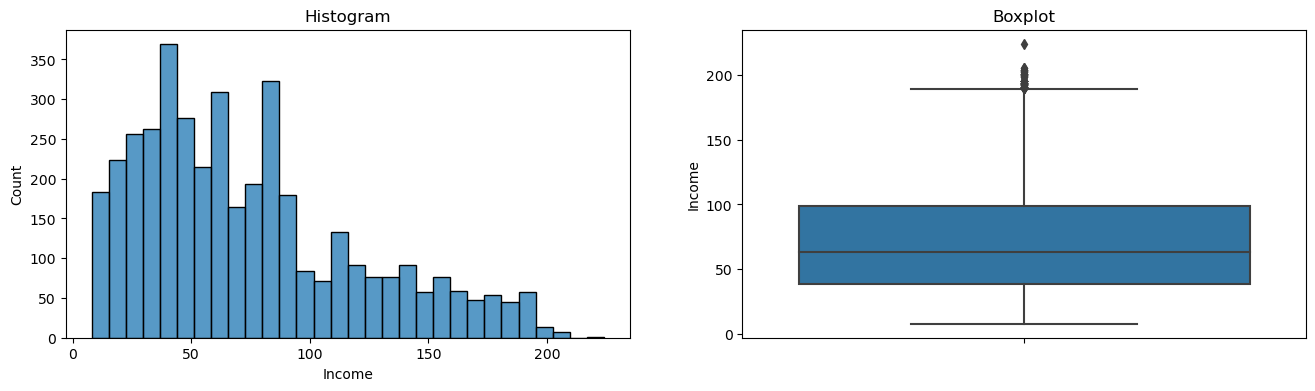


Income - After Capping


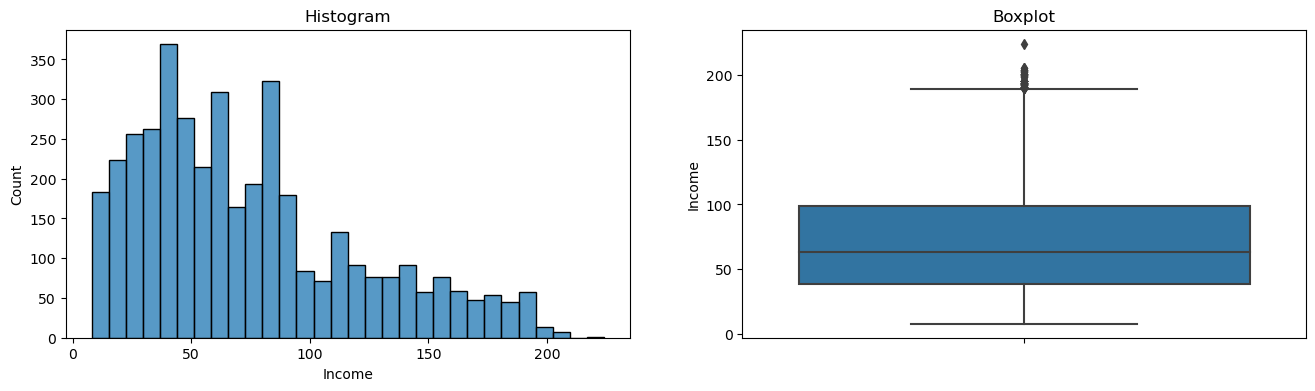

ZIP Code - Before Capping


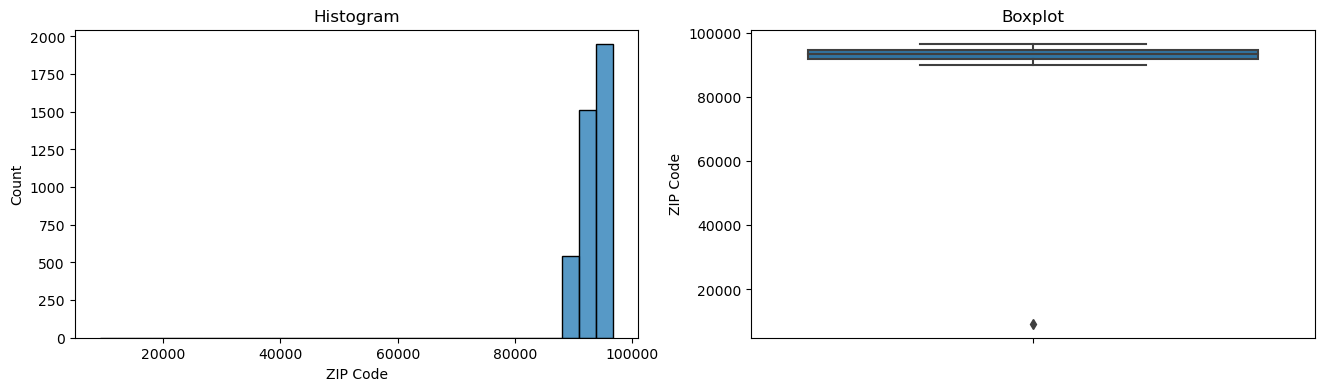


ZIP Code - After Capping


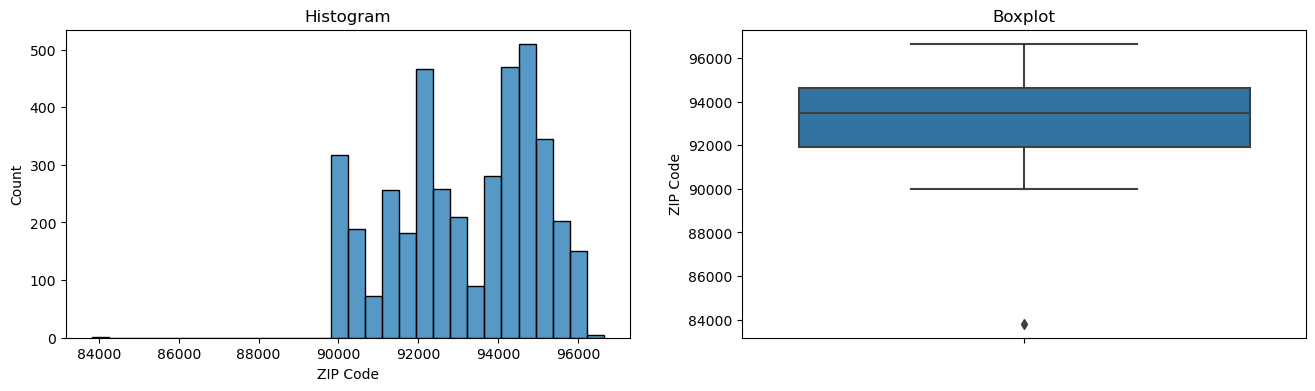

CCAvg - Before Capping


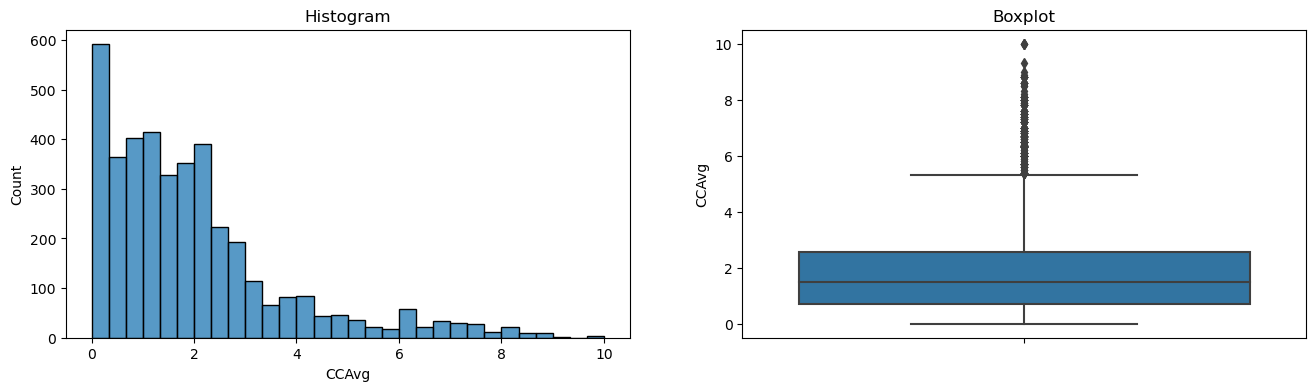


CCAvg - After Capping


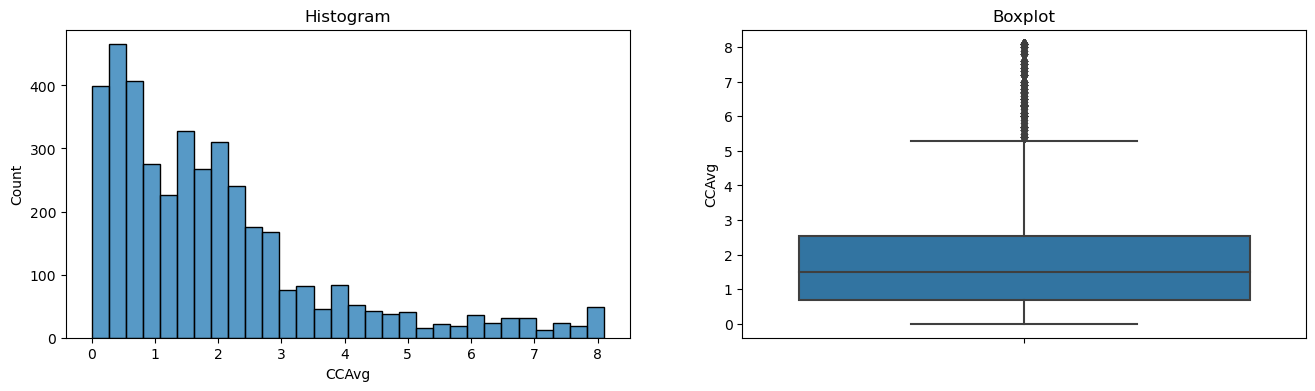

Mortgage - Before Capping


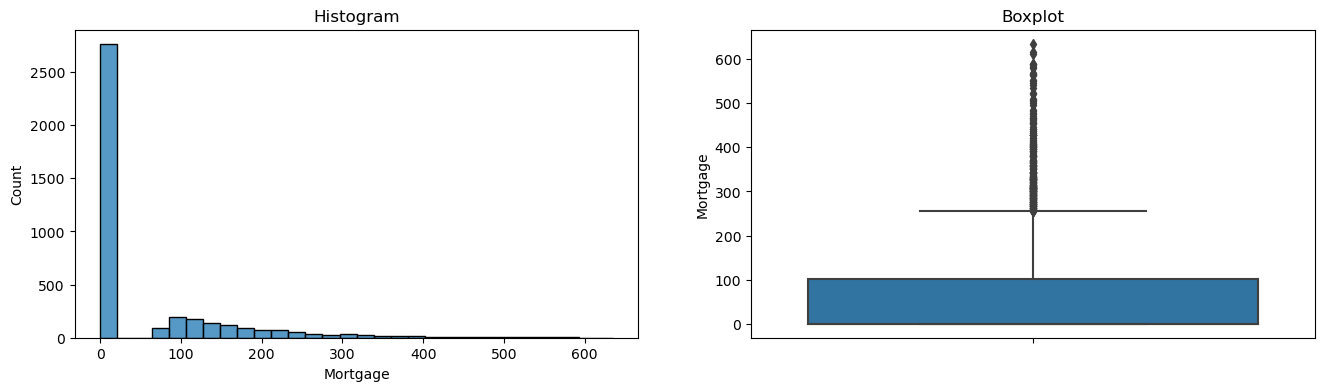


Mortgage - After Capping


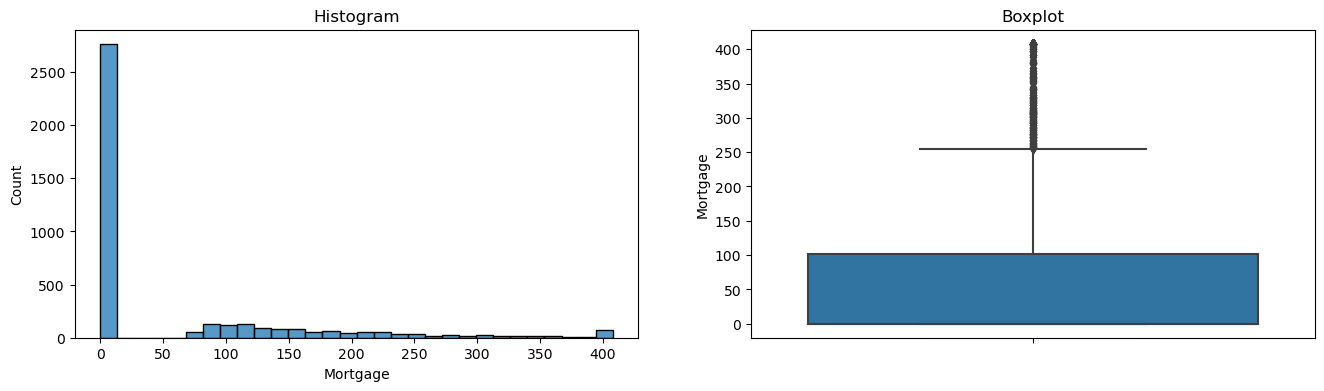

CreditCard - Before Capping


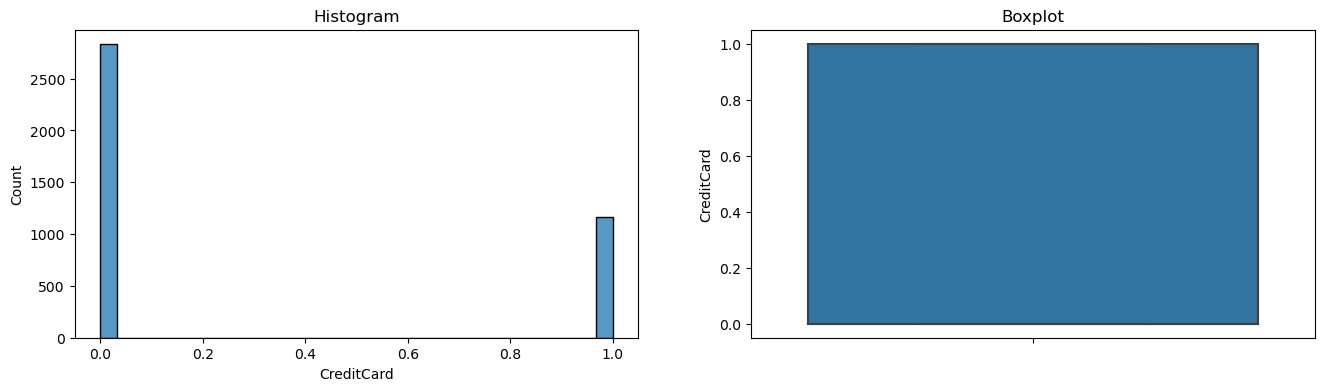


CreditCard - After Capping


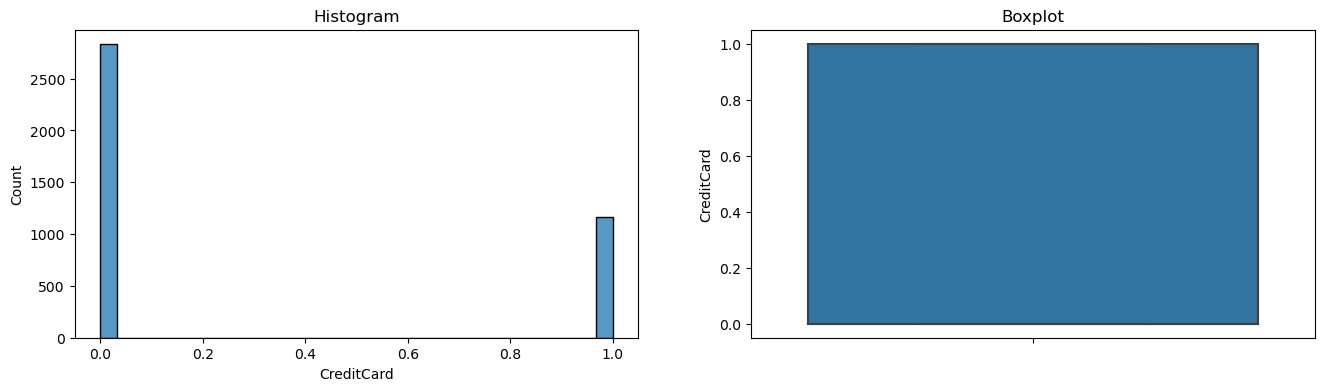

Age - Before Capping


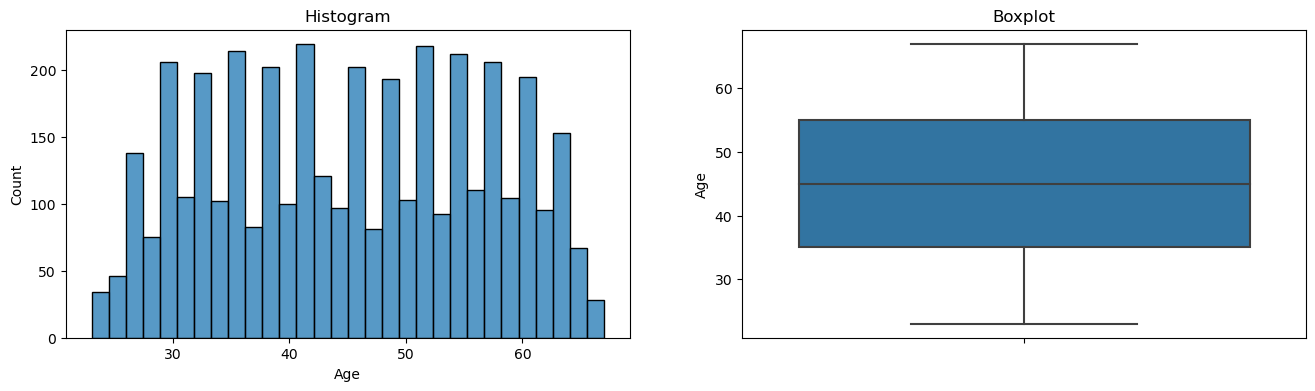


Age - After Capping


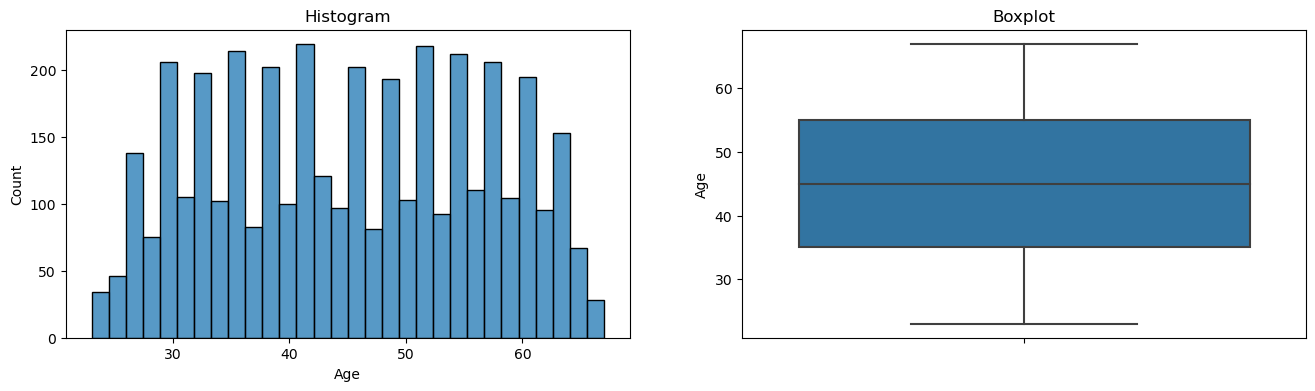

Experience - Before Capping


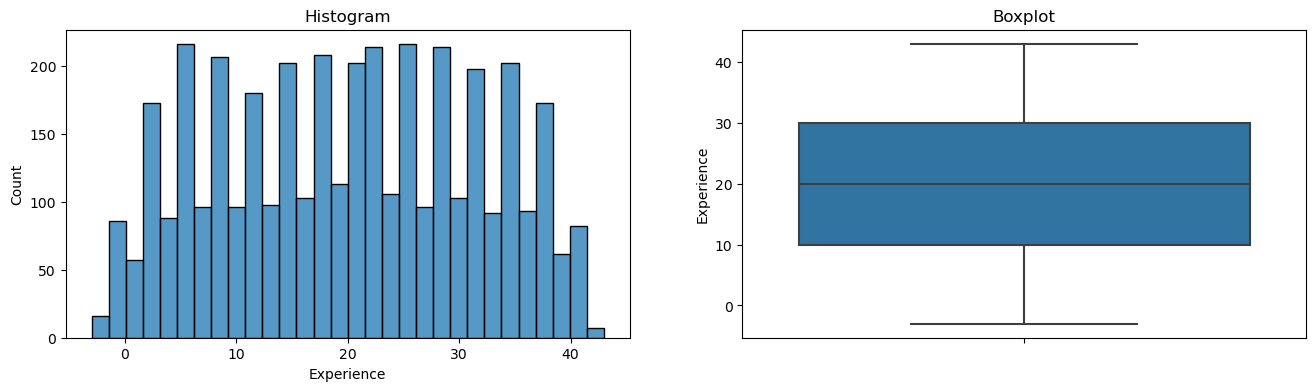


Experience - After Capping


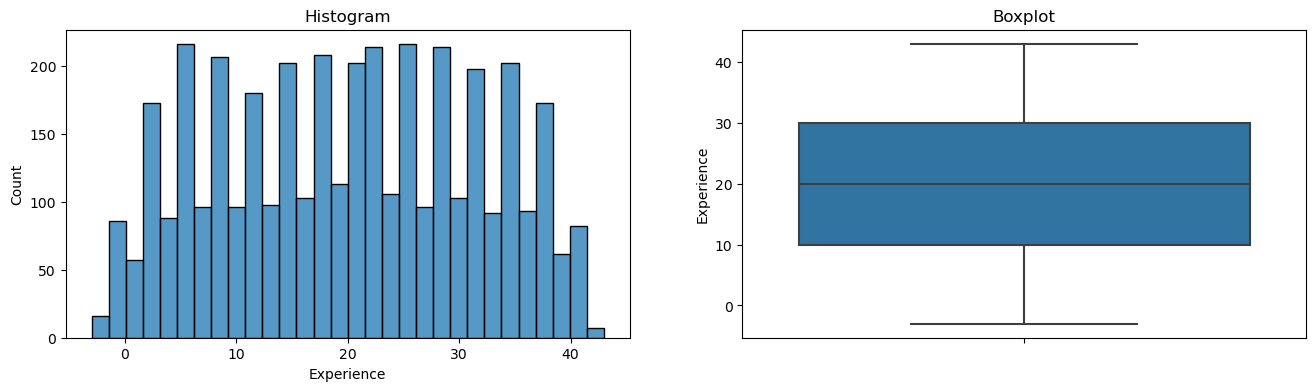

Family - Before Capping


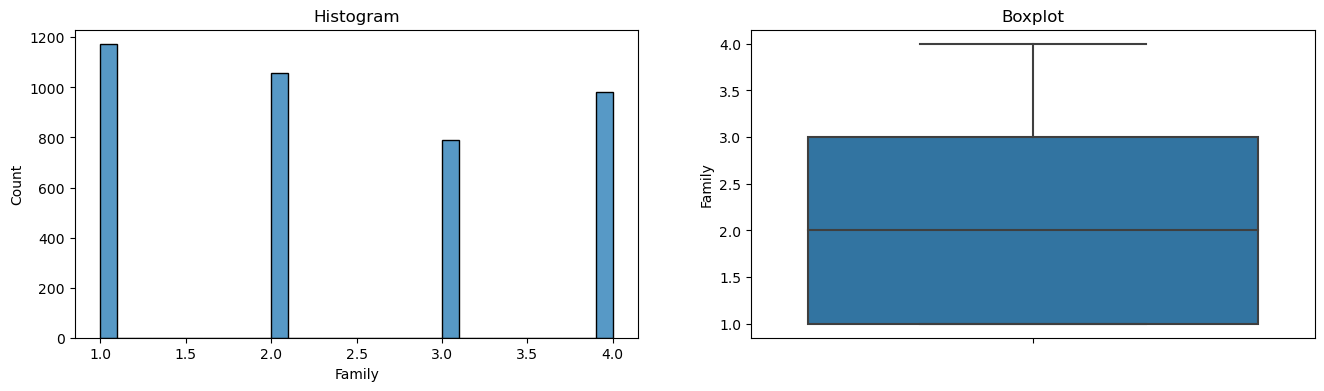


Family - After Capping


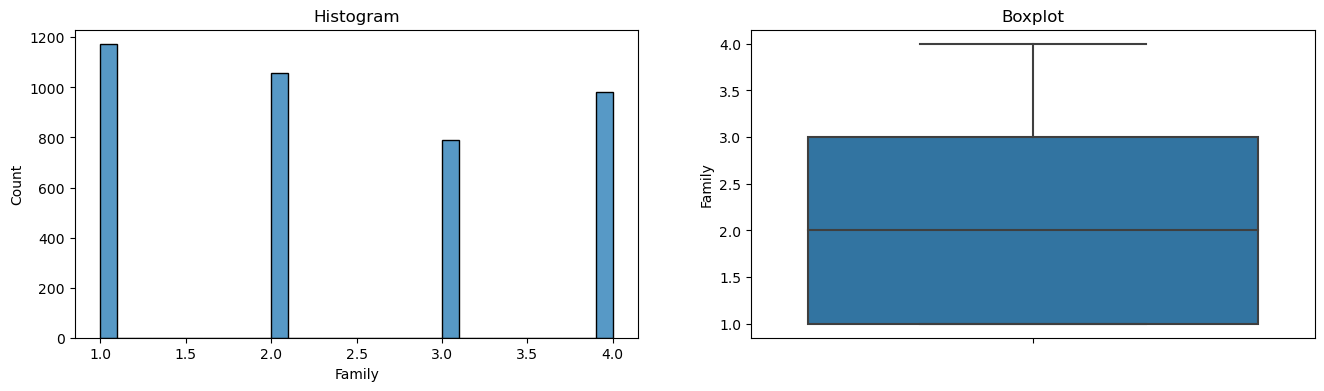

Education - Before Capping


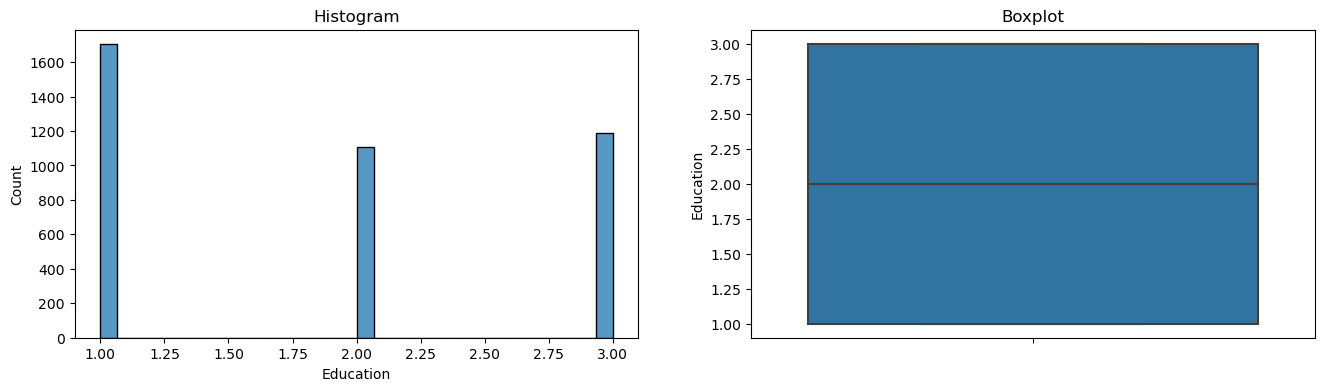


Education - After Capping


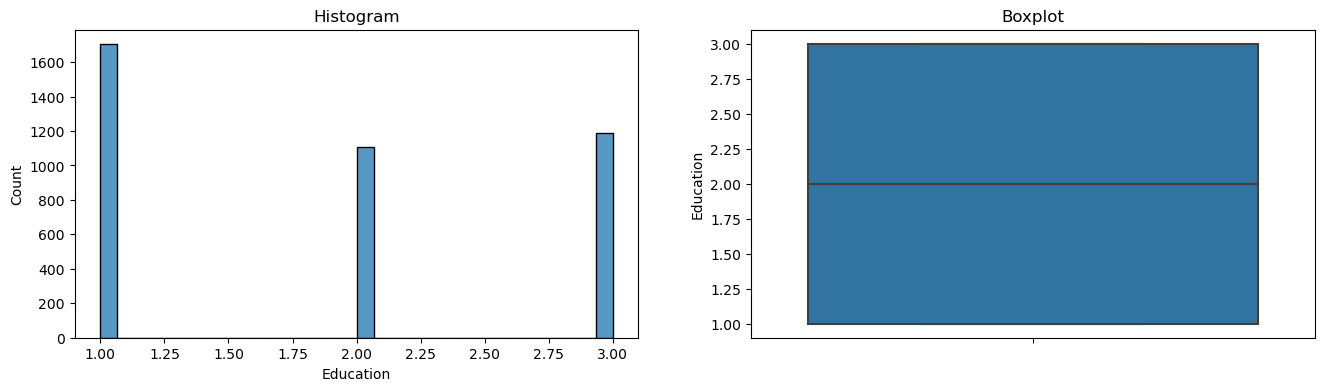

Online - Before Capping


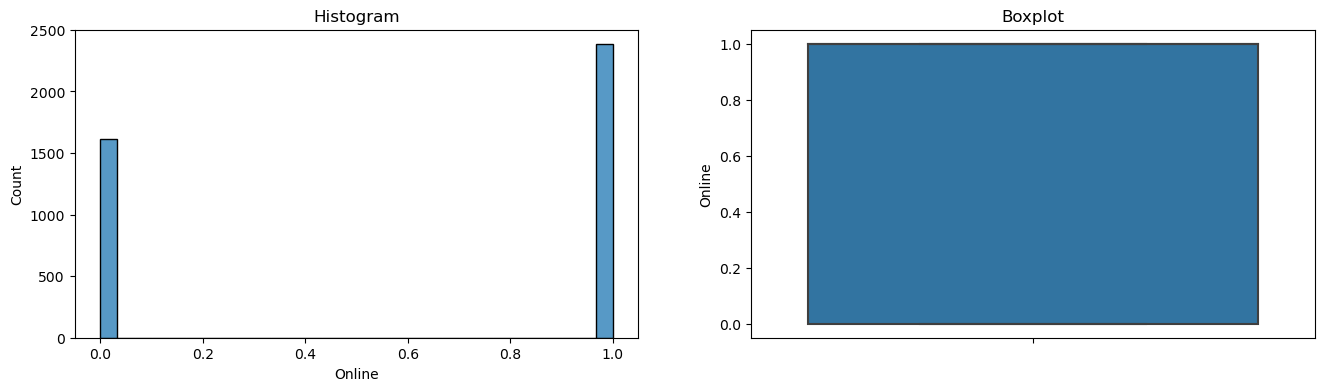


Online - After Capping


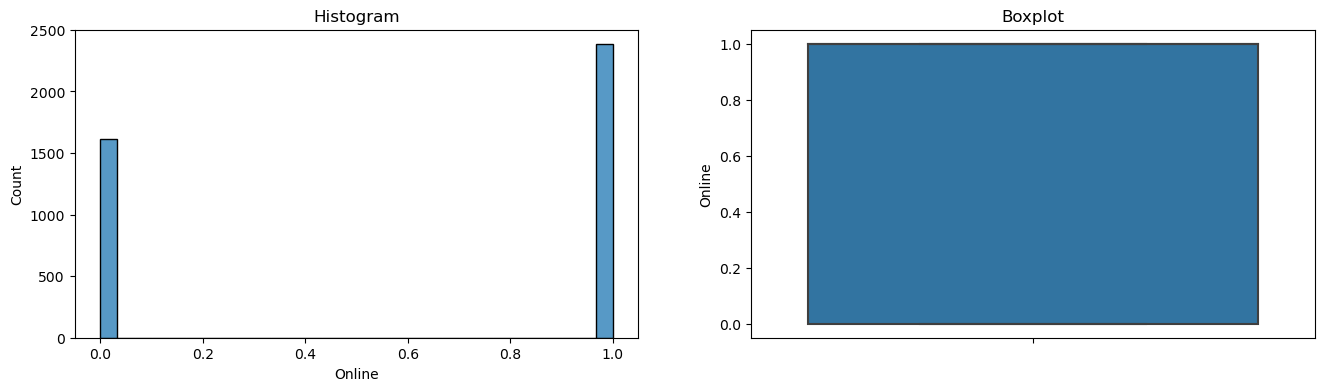

Securities Account - Before Capping


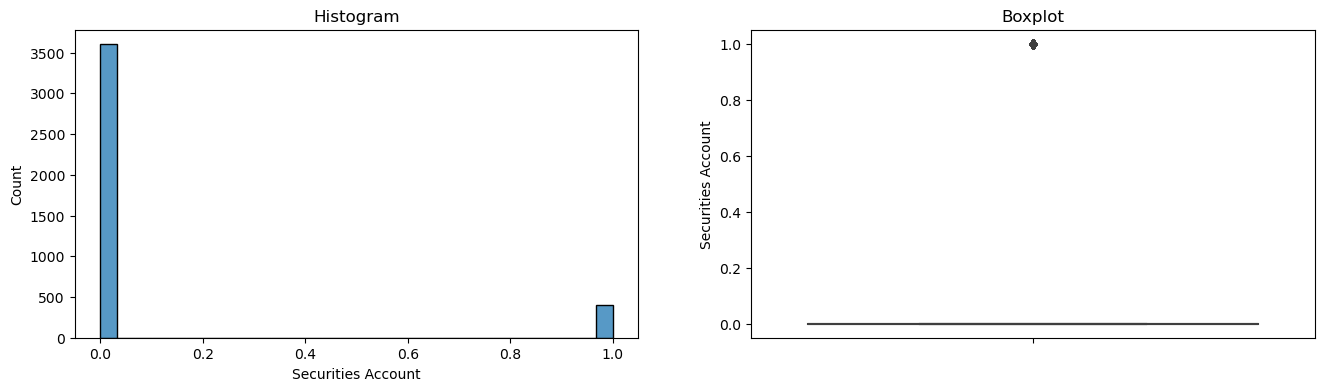


Securities Account - After Capping


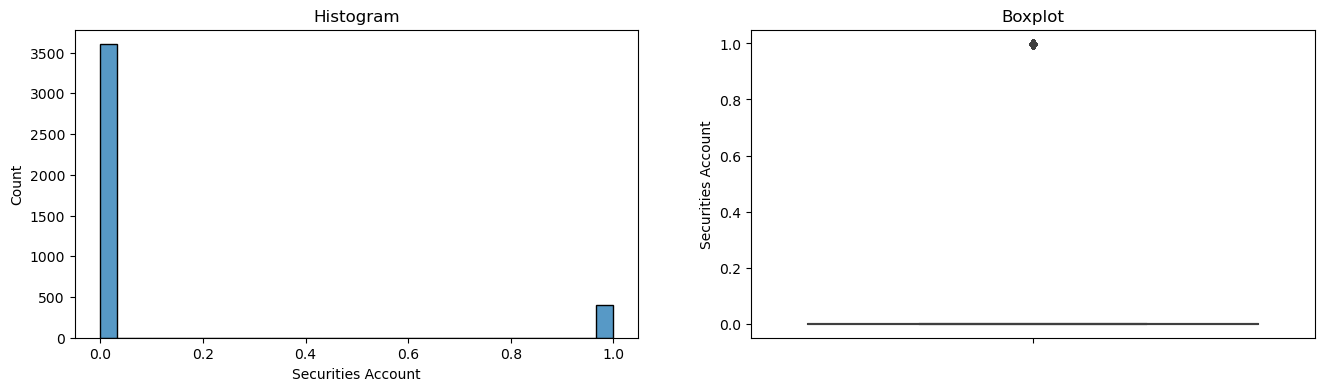

CD Account - Before Capping


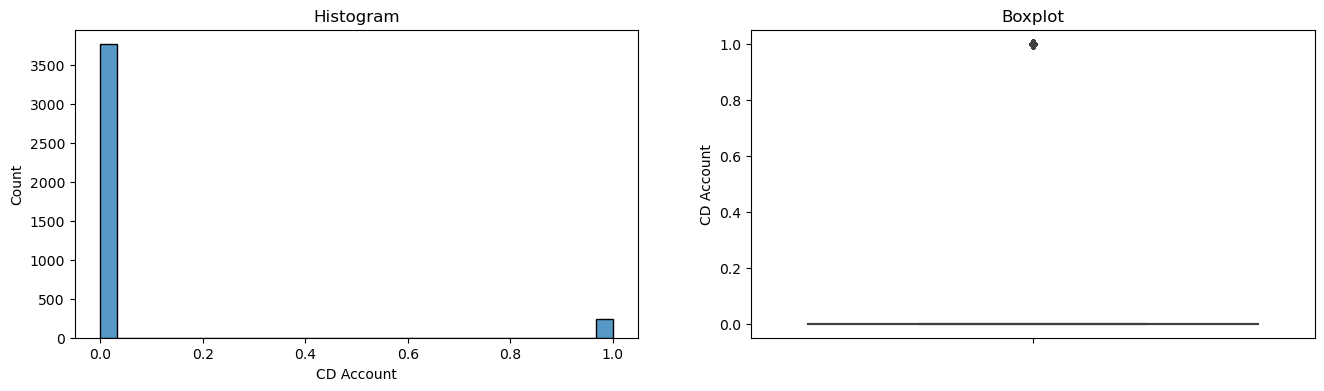


CD Account - After Capping


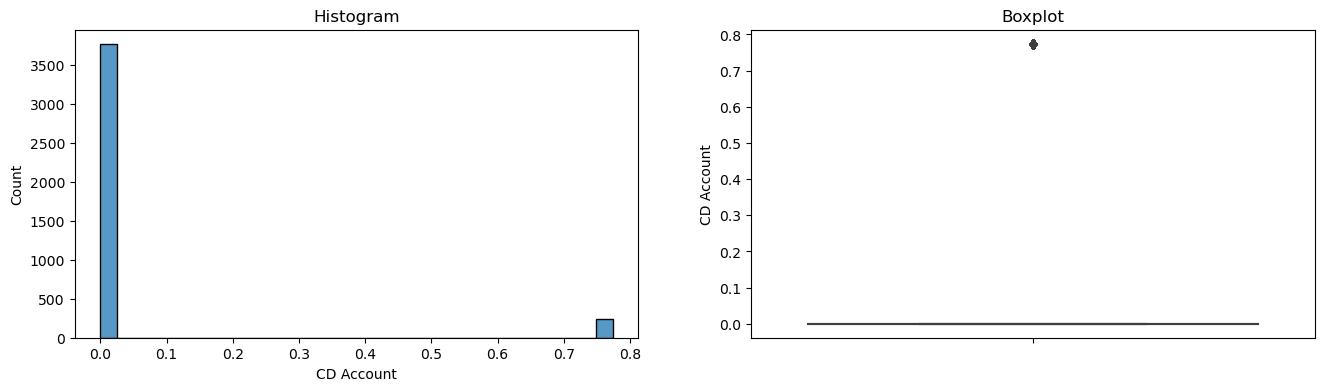

In [191]:
for col in skew + normal:
    print(f'{col} - Before Capping')
    diagnostic_plots(X_train, col)

    print(f'\n{col} - After Capping')
    diagnostic_plots(X_train_capped, col)

## **Feature Engineering**

### **Split Numerical & Categorical**

Semua kolom memang berjenis data int64 ataupun float sehingga tidak ada yang menunjukkan bahwa kolom tersebut kategorikal karena tidak ada tipe data object, akan tetapi pada kolom `Family`, `Education`, `Personal Loan`, `Securities Account`, `CD Account`, `Online`, `Credit Card` hanya memiliki 4 nilai unik yang mengartikan kolom-kolom ini memang kategorikal tetapi sudah dalam bentuk encode (angka), oleh karena itu pada section ini akan tetap saya pisahkan untuk kolom numerik dan kategorikal.

In [22]:
num_columns = X_train_capped[['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']]
cat_columns = X_train_capped[['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]

### **Correlation**

In [23]:
# Make a new dataframe
train_data = pd.concat([X_train, y_train], axis=1)

In [24]:
# Re-check missing value on new dataframe
train_data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

**Correlation - Numerical Columns**

**Cek Korelasi Antar Variabel Menggunakan Uji Korelasi**
- jika nilai skewness dibawah 0.5, diuji menggunakan metode korelasi Pointbiserial
- jika nilai skewness diatas 0.5, diuji menggunakan metode korelasi Spearman

Dipilihnya uji point biserial karena relevansinya dalam mengukur korelasi antara variabel biner dan numerik, yang umum dalam analisis korelasi dalam konteks bank loan

In [25]:
# Inisialisasi daftar untuk menyimpan hasil analisis
results = []

# Iterasi melalui kolom-kolom yang Anda ingin analisis
for kolom in num_columns:
    # Hitung skewness dari kolom saat ini
    skewness = train_data[kolom].skew()
    
    # Tentukan metode korelasi berdasarkan skewness
    correlation_type = 'Pointbiserial'
    if skewness >= 0.5:
        # Uji korelasi menggunakan Spearman jika skewness >= 0.5
        correlation_coefficient, p_value = stats.spearmanr(train_data['Personal Loan'], train_data[kolom])
    
    else:
        # Uji korelasi menggunakan Pointbiserial jika skewness < 0.5
        correlation_coefficient, p_value = stats.pointbiserialr(train_data['Personal Loan'], train_data[kolom])
    
    # Tentukan keterangan korelasi berdasarkan p-value
    correlation_significance = 'Signifikan' if p_value <= 0.05 else 'Tidak Signifikan'
    
    # Tambahkan hasil analisis ke dalam daftar
    results.append({'Kolom': kolom, 'Korelasi': correlation_coefficient, 'p-value': p_value, 'Metode': correlation_type, 'Keterangan': correlation_significance})

# Konversi hasil analisis ke dalam DataFrame
results_df = pd.DataFrame(results)

# Menyimpan hasil dalam DataFrame yang diurutkan berdasarkan nilai korelasi
sorted_results = results_df.sort_values(by='Korelasi', ascending=False)

In [26]:
sorted_results

,Kolom,Korelasi,p-value,Metode,Keterangan
2,Income,0.428311,3.685133e-178,Pointbiserial,Signifikan
4,CCAvg,0.310184,6.384786e-90,Pointbiserial,Signifikan
5,Mortgage,0.052874,8.231180e-04,Pointbiserial,Signifikan
1,Experience,0.014088,3.731190e-01,Pointbiserial,Tidak Signifikan
0,Age,0.014042,3.746729e-01,Pointbiserial,Tidak Signifikan
3,ZIP Code,0.005875,7.103343e-01,Pointbiserial,Tidak Signifikan


**Correlation - Categorical Columns**

In [27]:
# Inisialisasi dictionary untuk menyimpan nilai korelasi Kendall dan p-value
kendall_correlation = {}

# Loop melalui setiap kolom kategori (cat_cols)
for kolom in cat_columns:
    # Hitung korelasi Kendall antara kolom saat ini dan variabel target (Personal Loan)
    kendall_corr, p_value = kendalltau(train_data['Personal Loan'], train_data[kolom])
    
    # Tentukan keterangan korelasi berdasarkan p-value
    correlation_significance = 'Signifikan' if p_value <= 0.05 else 'Tidak Signifikan'
    
    # Simpan nilai korelasi dan p-value dalam dictionary
    kendall_correlation[kolom] = {'Kendall Correlation': kendall_corr, 'p-value': p_value, 'Keterangan': correlation_significance}

# Konversi hasil analisis ke dalam DataFrame
kendall_df = pd.DataFrame.from_dict(kendall_correlation, orient='index')
kendall_df.index.name = 'Kolom'

# Tampilkan hasil dengan pengurutan berdasarkan p-value
kendall_df_sorted = kendall_df.sort_values(by='p-value')

In [28]:
# Menampilkan hasil analisis
kendall_df_sorted

,Kendall Correlation,p-value,Keterangan
Kolom,,,
CD Account,0.322254,2.728456e-92,Signifikan
Education,0.129959,3.413012e-18,Signifikan
Family,0.066892,3.709046e-06,Signifikan
Securities Account,0.031221,4.837102e-02,Signifikan
Online,0.007042,6.561146e-01,Tidak Signifikan
CreditCard,-0.000702,9.645748e-01,Tidak Signifikan


**Columns that have correlation with `Personal Loan`:**

| Categorical | Numerical |
| --- | --- |
| CD Account | Income |
| Education | CCAvg |
| Family | Mortgage |
| Securities Account |  |

Final columns that will be used are 7 columns in total.

From 12 columns, we will use 7 columns which means we will drop 5 columns

In [29]:
# Split antara kolom numerik dan kategorikal
selected_numeric_cols = ['Income', 'CCAvg', 'Mortgage']
selected_categorical_cols = ['CD Account', 'Education', 'Family', 'Securities Account']

### **Encoding and Scaling**

In [30]:
# Split train set ke numerik dan kategorikal
X_train_num = X_train_capped[selected_numeric_cols]
X_train_cat = X_train_capped[selected_categorical_cols]

# Split test set ke numerik dan kategorikal
X_test_num = X_test_capped[selected_numeric_cols]
X_test_cat = X_test_capped[selected_categorical_cols]

**Scaling**

In [31]:
# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Fit scaler pada data train numerik
scaler.fit(X_train_num)

# Transformasi data train dan test numerik menggunakan scaler
X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

**Didnt encode the categorical data because the data has already encoded, so next step is concat the data**

In [32]:
# Gabungkan data numerik yang telah di-scaled dengan data kategorikal
X_train_final = np.concatenate([X_train_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test_cat], axis=1)

## **Handling Imbalanced**

In [35]:
# Oversampling with SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)
print(y_train_balanced.value_counts())

Personal Loan
0    3618
1    3618
Name: count, dtype: int64


## **Logistic Regression**

In [98]:
logreg = LogisticRegression()
logreg.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

**Default Parameter**

F1 Score - Train Set  :  0.903021978021978 

Classification Report - Train Set : 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      3618
           1       0.90      0.91      0.90      3618

    accuracy                           0.90      7236
   macro avg       0.90      0.90      0.90      7236
weighted avg       0.90      0.90      0.90      7236
 

F1 Score - Test Set  :  0.6194029850746269 

Classification Report - Test Set : 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       901
           1       0.49      0.84      0.62        99

    accuracy                           0.90      1000
   macro avg       0.74      0.87      0.78      1000
weighted avg       0.93      0.90      0.91      1000
 



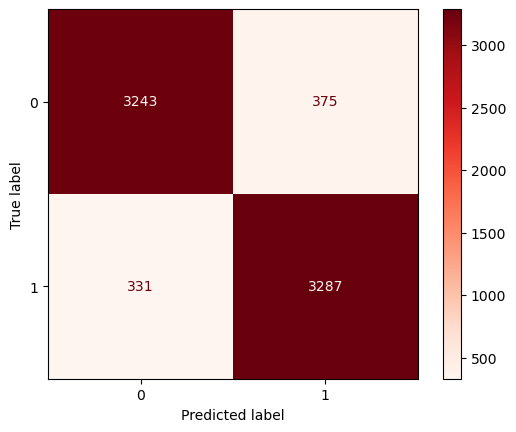

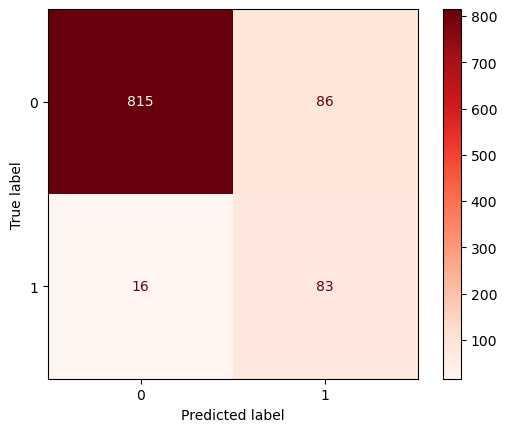

In [37]:
# Membuat pipeline
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('logreg', LogisticRegression(random_state=42))])

# Fit Pipeline di training data
pipe.fit(X_train_balanced, y_train_balanced)

# Prediksi data train menggunakan pipeline
y_train_pred = pipe.predict(X_train_balanced)

# Menghitung F1-Score untuk train set
f1_train = f1_score(y_train_balanced, y_train_pred)
print('F1 Score - Train Set  : ', f1_train, '\n')

# Print Classification Report untuk data train
print('Classification Report - Train Set : \n', classification_report(y_train_balanced, y_train_pred), '\n')

# Menampilkan Confusion Matrix untuk train set
disp_train = ConfusionMatrixDisplay.from_estimator(pipe, X_train_balanced, y_train_balanced, cmap='Reds')

# Prediksi data test menggunakan pipeline
y_test_pred = pipe.predict(X_test_final)

# Menghitung F1-Score untuk test set
f1_test = f1_score(y_test, y_test_pred)
print('F1 Score - Test Set  : ', f1_test, '\n')

#  Print Classification Report untuk data test
print('Classification Report - Test Set : \n', classification_report(y_test, y_test_pred), '\n')

# Menampilkan Confusion Matrix untuk test set
disp_test = ConfusionMatrixDisplay.from_estimator(pipe, X_test_final, y_test, cmap='Reds')

In [100]:
# Melakukan validasi silang pada data latih
cv_results_logreg = cross_validate(logreg, X_train_balanced, y_train_balanced, scoring=['accuracy'], return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_logreg['test_accuracy'].mean()}")

# Melakukan validasi silang pada data uji
cv_results_logreg_test = cross_validate(logreg, X_test_final, y_test, scoring=['accuracy'], return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_logreg_test['test_accuracy'].mean()}")

Average score of Train Cross Validation is 0.9013269022973803
Average score of Test Cross Validation is 0.9549999999999998


## **KNN (K-Nearest Neighbor)**

In [176]:
# Inisialisasi model kNN
knn_model = KNeighborsClassifier()

**Default Parameter**

In [177]:
# Melatih model kNN
knn_model.fit(X_train_balanced, y_train_balanced)

# Menghitung dan mencetak akurasi pada set data latih
train_accuracy = knn_model.score(X_train_balanced, y_train_balanced)
print('Accuracy of KNN on training set: {:.2f}'.format(train_accuracy))

# Prediksi pada set data latih
y_train_pred = knn_model.predict(X_train_balanced)

# Menghitung dan mencetak F1 score pada set data latih
f1_train = f1_score(y_train_balanced, y_train_pred)
print('F1 Score on Training Set: {:.2f}'.format(f1_train))

# Menampilkan classification report pada set data latih
print('Classification Report - Training Set:')
print(classification_report(y_train_balanced, y_train_pred))

# Menghitung dan mencetak akurasi pada set data uji
test_accuracy = knn_model.score(X_test_final, y_test)
print('Accuracy of KNN on test set: {:.2f}'.format(test_accuracy))

# Prediksi pada set data uji
y_test_pred = knn_model.predict(X_test_final)

# Menghitung dan mencetak F1 score pada set data uji
f1_test = f1_score(y_test, y_test_pred)
print('F1 Score on Test Set: {:.2f}'.format(f1_test))

# Menampilkan classification report pada set data uji
print('Classification Report - Test Set:')
print(classification_report(y_test, y_test_pred))

Accuracy of KNN on training set: 0.99
F1 Score on Training Set: 0.99
Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3618
           1       0.99      1.00      0.99      3618

    accuracy                           0.99      7236
   macro avg       0.99      0.99      0.99      7236
weighted avg       0.99      0.99      0.99      7236

Accuracy of KNN on test set: 0.97
F1 Score on Test Set: 0.83
Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       901
           1       0.82      0.84      0.83        99

    accuracy                           0.97      1000
   macro avg       0.90      0.91      0.91      1000
weighted avg       0.97      0.97      0.97      1000



**With Tuned Hyperparameter**

Best Hyperparameters: {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'}
Best score is 0.992983796962107
F1 Score - Train Set  :  1.0
Accuracy Score - Train Set: 1.00
Classification Report - Train Set : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3618
           1       1.00      1.00      1.00      3618

    accuracy                           1.00      7236
   macro avg       1.00      1.00      1.00      7236
weighted avg       1.00      1.00      1.00      7236
 

F1 Score - Test Set  :  0.837696335078534
Accuracy Score - Test Set: 0.97
Classification Report - Test Set : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       901
           1       0.87      0.81      0.84        99

    accuracy                           0.97      1000
   macro avg       0.92      0.90      0.91      1000
weighted avg       0.97      0.97      0.97      1000
 



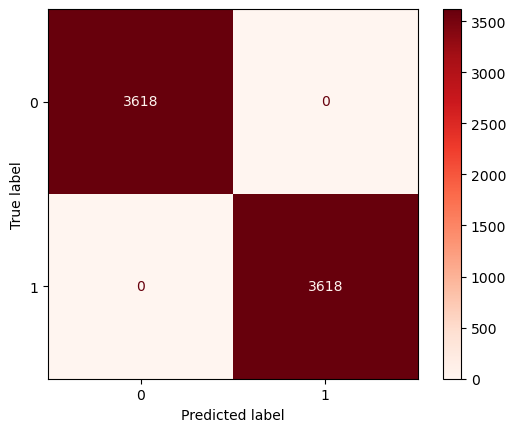

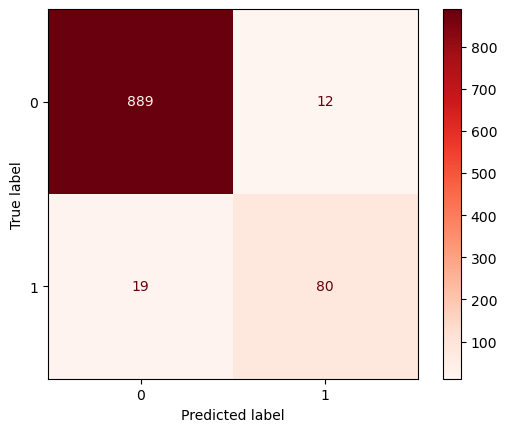

In [178]:
# Inisialisasi pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Langkah pertama: Skalasi fitur
    ('knn', KNeighborsClassifier())  # Langkah kedua: Model kNN
])

# Parameter grid untuk hyperparameter tuning
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],  # Jumlah tetangga
    'knn__weights': ['uniform', 'distance'],  # Jenis pembobotan
    'knn__p': [1, 2]  # Jenis jarak (1 untuk Manhattan, 2 untuk Euclidean)
}

# Inisialisasi GridSearchCV untuk hyperparameter tuning di dalam pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1')

# Melatih model dengan GridSearchCV menggunakan data yang sudah di-handle ketidakseimbangan
grid_search.fit(X_train_balanced, y_train_balanced)

# Mendapatkan hyperparameter terbaik yang dihasilkan oleh GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Print the score
print("Best score is {}".format(grid_search.best_score_))

# Prediksi dan evaluasi model terbaik pada data latih
y_pred_train = grid_search.predict(X_train_balanced)
f1_train = f1_score(y_train_balanced, y_pred_train)
accuracy_train = accuracy_score(y_train_balanced, y_pred_train)
print('F1 Score - Train Set  : ', f1_train)
print('Accuracy Score - Train Set: {:.2f}'.format(accuracy_train))
print('Classification Report - Train Set : \n', classification_report(y_train_balanced, y_pred_train), '\n')

# Menampilkan Confusion Matrix untuk train set
disp_train = ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_train_balanced, y_train_balanced, cmap='Reds')

# Prediksi dan evaluasi model terbaik pada data uji
y_pred_test = grid_search.predict(X_test_final)
f1_test = f1_score(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print('F1 Score - Test Set  : ', f1_test)
print('Accuracy Score - Test Set: {:.2f}'.format(accuracy_test))
print('Classification Report - Test Set : \n', classification_report(y_test, y_pred_test), '\n')

# Menampilkan Confusion Matrix untuk test set
disp_test = ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test_final, y_test, cmap='Reds')

**Cross Validation of kNN**

In [181]:
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X_train_balanced, y_train_balanced, cv=5, scoring='f1')
print("Average F1 Score of Cross Validation: {:.2f}".format(cv_scores.mean()))

Average F1 Score of Cross Validation: 0.99


In [180]:
from sklearn.model_selection import cross_validate

# Melakukan validasi silang pada data latih
cv_results_knn_model = cross_validate(knn_model, X_train_balanced, y_train_balanced, scoring=['accuracy'], return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_knn_model['test_accuracy'].mean()}")

# Melakukan validasi silang pada data uji
cv_results_knn_model_test = cross_validate(knn_model, X_test_final, y_test, scoring=['accuracy'], return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_knn_model_test['test_accuracy'].mean()}")

Average score of Train Cross Validation is 0.9886677332030072
Average score of Test Cross Validation is 0.9570000000000001


## **Support Vector Machine**

**Default parameter**

In [113]:
svc=SVC() #Default
svc.fit(X_train_balanced,y_train_balanced)

SVC()

In [114]:
# Menghitung dan mencetak akurasi pada set data latih
train_accuracy = svc.score(X_train_balanced, y_train_balanced)
print('Accuracy of SVM on training set: {:.2f}'.format(train_accuracy))

# Prediksi pada set data latih
y_train_pred = svc.predict(X_train_balanced)

# Menghitung dan mencetak F1 score pada set data latih
f1_train = f1_score(y_train_balanced, y_train_pred)
print('F1 Score on Training Set: {:.2f}'.format(f1_train))

# Menampilkan classification report pada set data latih
print('Classification Report - Training Set:')
print(classification_report(y_train_balanced, y_train_pred))

# Menghitung dan mencetak akurasi pada set data uji
test_accuracy = svc.score(X_test_final, y_test)
print('Accuracy of SVM on test set: {:.2f}'.format(test_accuracy))

# Prediksi pada set data uji
y_test_pred = svc.predict(X_test_final)

# Menghitung dan mencetak F1 score pada set data uji
f1_test = f1_score(y_test, y_test_pred)
print('F1 Score on Test Set: {:.2f}'.format(f1_test))

# Menampilkan classification report pada set data uji
print('Classification Report - Test Set:')
print(classification_report(y_test, y_test_pred))

Accuracy of SVM on training set: 0.98
F1 Score on Training Set: 0.98
Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3618
           1       0.97      0.98      0.98      3618

    accuracy                           0.98      7236
   macro avg       0.98      0.98      0.98      7236
weighted avg       0.98      0.98      0.98      7236

Accuracy of SVM on test set: 0.96
F1 Score on Test Set: 0.81
Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       901
           1       0.73      0.91      0.81        99

    accuracy                           0.96      1000
   macro avg       0.86      0.94      0.89      1000
weighted avg       0.96      0.96      0.96      1000



In [71]:
from sklearn.model_selection import cross_validate

# Melakukan validasi silang pada data latih
cv_results_svc = cross_validate(svc, X_train_balanced, y_train_balanced, scoring=['accuracy'], return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_svc['test_accuracy'].mean()}")

# Melakukan validasi silang pada data uji
cv_results_svc_test = cross_validate(svc, X_test_final, y_test, scoring=['accuracy'], return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_svc_test['test_accuracy'].mean()}")

Average score of Train Cross Validation is 0.9755395999343278
Average score of Test Cross Validation is 0.9639999999999999


**With Tuned Hyperparameter**

Best Hyperparameters: {'svc_model__C': 100.0, 'svc_model__gamma': 'scale', 'svc_model__kernel': 'rbf'}
Accuracy SVC Score on Train Set: 0.9918
Accuracy SVC Score on Test Set: 0.9700
F1 Score - Train Set  :  0.9918406859355552
Classification Report - Train Set : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3618
           1       0.99      0.99      0.99      3618

    accuracy                           0.99      7236
   macro avg       0.99      0.99      0.99      7236
weighted avg       0.99      0.99      0.99      7236
 

F1 Score - Test Set  :  0.8469387755102041
Classification Report - Test Set : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       901
           1       0.86      0.84      0.85        99

    accuracy                           0.97      1000
   macro avg       0.92      0.91      0.92      1000
weighted avg       0.97      0.97      0.97      1000
 

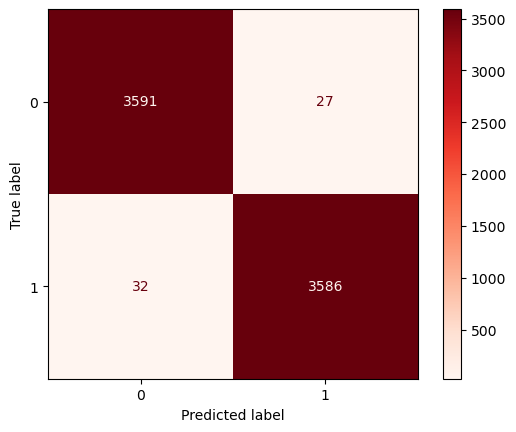

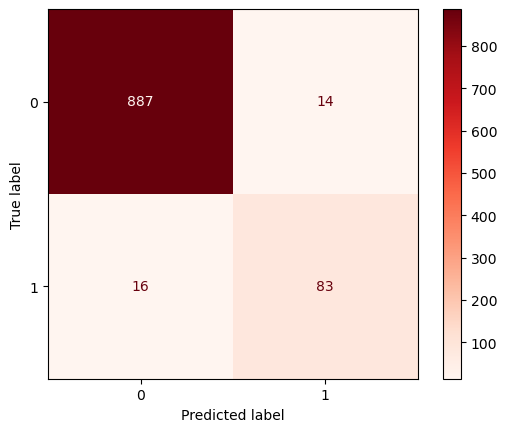

In [116]:
# Inisialisasi pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Langkah pertama: Skalasi fitur
    ('svc_model', SVC())  # Langkah kedua: Model SVC
])

# Parameter grid untuk hyperparameter tuning di dalam GridSearchCV
param_grid = {
    'svc_model__C': [1.0, 10.0, 100.0],  # Contoh nilai untuk C
    'svc_model__gamma': ['scale', 'auto'],  # Contoh nilai untuk gamma
    'svc_model__kernel': ['linear', 'rbf']  # Contoh nilai untuk kernel
}

# Inisialisasi GridSearchCV untuk hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1')

# Melatih model dengan GridSearchCV menggunakan data yang sudah di-handle ketidakseimbangan
grid_search.fit(X_train_balanced, y_train_balanced)

# Mendapatkan hyperparameter terbaik yang dihasilkan oleh GridSearchCV
best_params_grid = grid_search.best_params_
print("Best Hyperparameters:", best_params_grid)

# Prediksi dan evaluasi model terbaik pada data latih
y_pred_train = grid_search.predict(X_train_balanced)
print("Accuracy SVC Score on Train Set: {:.4f}".format(accuracy_score(y_train_balanced, y_pred_train)))

# Prediksi dan evaluasi model terbaik pada data uji
y_pred_test = grid_search.predict(X_test_final)
print("Accuracy SVC Score on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred_test)))

# Menghitung F1 score dan classification report untuk data latih
f1_train = f1_score(y_train_balanced, y_pred_train)
print('F1 Score - Train Set  : ', f1_train)
print('Classification Report - Train Set : \n', classification_report(y_train_balanced, y_pred_train), '\n')

# Menghitung F1 score dan classification report untuk data uji
f1_test = f1_score(y_test, y_pred_test)
print('F1 Score - Test Set  : ', f1_test)
print('Classification Report - Test Set : \n', classification_report(y_test, y_pred_test), '\n')

# Menampilkan Confusion Matrix untuk data latih
disp_train = ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_train_balanced, y_train_balanced, cmap='Reds')

# Menampilkan Confusion Matrix untuk data uji
disp_test = ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test_final, y_test, cmap='Reds')

In [182]:
# Mendapatkan model terbaik dari grid search
best_model = grid_search.best_estimator_

# Melakukan cross-validation untuk menghitung skor F1
cv_scores = cross_val_score(best_model, X_train_balanced, y_train_balanced, cv=5, scoring='f1')

# Menampilkan rata-rata skor F1 dari cross-validation
print("Mean F1 Score of Cross Validation: {:.2f}".format(cv_scores.mean()))

Mean F1 Score of Cross Validation: 0.99


## **Decision Tree**

**Default parameter**

In [118]:
# Melatih model Decision Tree
dt = DecisionTreeClassifier() #Default hyperparameters
dt.fit(X_train_balanced, y_train_balanced)

# Menghitung dan mencetak akurasi pada set data latih
train_accuracy = dt.score(X_train_balanced, y_train_balanced)
print('Accuracy of Decision Tree on training set: {:.2f}'.format(train_accuracy))

# Prediksi pada set data latih
y_train_pred = dt.predict(X_train_balanced)

# Menghitung dan mencetak F1 score pada set data latih
f1_train = f1_score(y_train_balanced, y_train_pred)
print('F1 Score on Training Set: {:.2f}'.format(f1_train))

# Menampilkan classification report pada set data latih
print('Classification Report - Training Set:')
print(classification_report(y_train_balanced, y_train_pred))

# Menghitung dan mencetak akurasi pada set data uji
test_accuracy = dt.score(X_test_final, y_test)
print('Accuracy of Decision Tree on test set: {:.2f}'.format(test_accuracy))

# Prediksi pada set data uji
y_test_pred = dt.predict(X_test_final)

# Menghitung dan mencetak F1 score pada set data uji
f1_test = f1_score(y_test, y_test_pred)
print('F1 Score on Test Set: {:.2f}'.format(f1_test))

# Menampilkan classification report pada set data uji
print('Classification Report - Test Set:')
print(classification_report(y_test, y_test_pred))

Accuracy of Decision Tree on training set: 1.00
F1 Score on Training Set: 1.00
Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3618
           1       1.00      1.00      1.00      3618

    accuracy                           1.00      7236
   macro avg       1.00      1.00      1.00      7236
weighted avg       1.00      1.00      1.00      7236

Accuracy of Decision Tree on test set: 0.99
F1 Score on Test Set: 0.93
Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       901
           1       0.93      0.93      0.93        99

    accuracy                           0.99      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.99      0.99      0.99      1000



In [119]:
from sklearn.model_selection import cross_validate

# Melakukan validasi silang pada data latih
cv_results_dt_train = cross_validate(dt, X_train_balanced, y_train_balanced, scoring=['accuracy'], return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_dt_train['test_accuracy'].mean()}")

# Melakukan validasi silang pada data uji
cv_results_dt_test = cross_validate(dt, X_test_final, y_test, scoring=['accuracy'], return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_dt_test['test_accuracy'].mean()}")

Average score of Train Cross Validation is 0.9881158197375404
Average score of Test Cross Validation is 0.977


**With Tuned Hyperparameter**

Best Hyperparameters: {'dt__criterion': 'entropy', 'dt__max_depth': None, 'dt__max_features': None, 'dt__min_impurity_decrease': 0.0, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2, 'dt__splitter': 'random'}
Accuracy Decision Tree Score on Train Set: 1.0000
Accuracy Decision Tree Score on Test Set: 0.9770
F1 Score - Train Set  :  1.0
Classification Report - Train Set : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3618
           1       1.00      1.00      1.00      3618

    accuracy                           1.00      7236
   macro avg       1.00      1.00      1.00      7236
weighted avg       1.00      1.00      1.00      7236
 

F1 Score - Test Set  :  0.8808290155440415
Classification Report - Test Set : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       901
           1       0.90      0.86      0.88        99

    accuracy                           0.98   

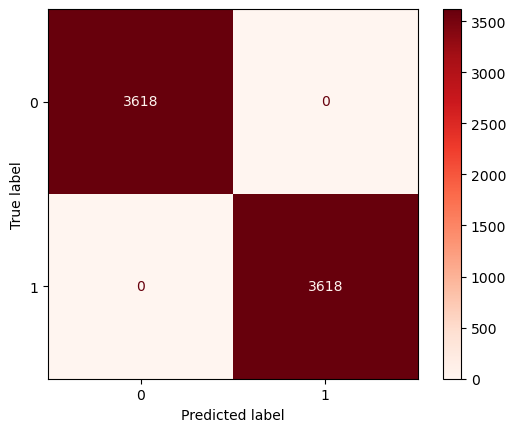

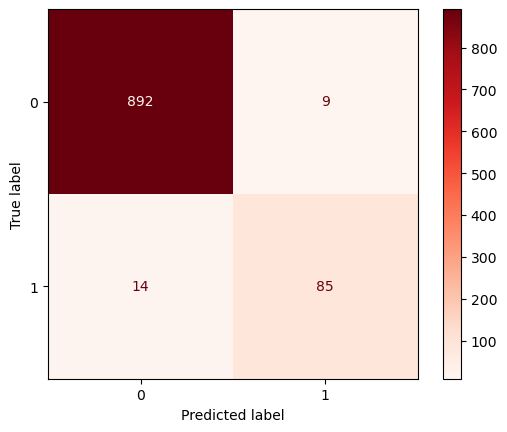

In [132]:
# Inisialisasi pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Langkah pertama: Skalasi fitur
    ('dt', DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', min_impurity_decrease=0.01))  # Langkah kedua: Model Decision Tree
])

# Parameter grid untuk hyperparameter tuning di dalam GridSearchCV
param_grid = {
    'dt__max_depth': [5, 10, 15, None],  
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 5, 10],
    'dt__max_features': ['sqrt', 'log2', None],
    'dt__min_impurity_decrease': [0.0, 0.01, 0.05, 0.1],
    'dt__criterion': ['gini', 'entropy'],
    'dt__splitter': ['best', 'random']
}

# Inisialisasi GridSearchCV untuk hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1')

# Melatih model dengan GridSearchCV menggunakan data yang sudah di-handle ketidakseimbangan
grid_search.fit(X_train_balanced, y_train_balanced)

# Mendapatkan hyperparameter terbaik yang dihasilkan oleh GridSearchCV
best_params_grid = grid_search.best_params_
print("Best Hyperparameters:", best_params_grid)

# Prediksi dan evaluasi model terbaik pada data latih
y_pred_train = grid_search.predict(X_train_balanced)
print("Accuracy Decision Tree Score on Train Set: {:.4f}".format(accuracy_score(y_train_balanced, y_pred_train)))

# Prediksi dan evaluasi model terbaik pada data uji
y_pred_test = grid_search.predict(X_test_final)
print("Accuracy Decision Tree Score on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred_test)))

# Menghitung F1 score dan classification report untuk data latih
f1_train = f1_score(y_train_balanced, y_pred_train)
print('F1 Score - Train Set  : ', f1_train)
print('Classification Report - Train Set : \n', classification_report(y_train_balanced, y_pred_train), '\n')

# Menghitung F1 score dan classification report untuk data uji
f1_test = f1_score(y_test, y_pred_test)
print('F1 Score - Test Set  : ', f1_test)
print('Classification Report - Test Set : \n', classification_report(y_test, y_pred_test), '\n')

# Menampilkan Confusion Matrix untuk data latih
disp_train = ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_train_balanced, y_train_balanced, cmap='Reds')

# Menampilkan Confusion Matrix untuk data uji
disp_test = ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test_final, y_test, cmap='Reds')

In [183]:
# Mendapatkan model terbaik dari grid search
best_model = grid_search.best_estimator_

# Melakukan cross-validation untuk menghitung skor F1
cv_scores = cross_val_score(best_model, X_train_balanced, y_train_balanced, cv=5, scoring='f1')

# Menampilkan rata-rata skor F1 dari cross-validation
print("Mean F1 Score of Cross Validation: {:.2f}".format(cv_scores.mean()))

Mean F1 Score of Cross Validation: 0.99


## **Random Forest**

**Default parameter**

In [136]:
# Melatih model Random Forest
rf = RandomForestClassifier() #Default hyperparameters
rf.fit(X_train_balanced, y_train_balanced)

# Menghitung dan mencetak akurasi pada set data latih
train_accuracy = rf.score(X_train_balanced, y_train_balanced)
print('Accuracy of Random Forest on training set: {:.2f}'.format(train_accuracy))

# Prediksi pada set data latih
y_train_pred = rf.predict(X_train_balanced)

# Menghitung dan mencetak F1 score pada set data latih
f1_train = f1_score(y_train_balanced, y_train_pred)
print('F1 Score on Training Set: {:.2f}'.format(f1_train))

# Menampilkan classification report pada set data latih
print('Classification Report - Training Set:')
print(classification_report(y_train_balanced, y_train_pred))

# Menghitung dan mencetak akurasi pada set data uji
test_accuracy = rf.score(X_test_final, y_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(test_accuracy))

# Prediksi pada set data uji
y_test_pred = rf.predict(X_test_final)

# Menghitung dan mencetak F1 score pada set data uji
f1_test = f1_score(y_test, y_test_pred)
print('F1 Score on Test Set: {:.2f}'.format(f1_test))

# Menampilkan classification report pada set data uji
print('Classification Report - Test Set:')
print(classification_report(y_test, y_test_pred))

Accuracy of Random Forest on training set: 1.00
F1 Score on Training Set: 1.00
Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3618
           1       1.00      1.00      1.00      3618

    accuracy                           1.00      7236
   macro avg       1.00      1.00      1.00      7236
weighted avg       1.00      1.00      1.00      7236

Accuracy of Random Forest on test set: 0.98
F1 Score on Test Set: 0.89
Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       901
           1       0.90      0.89      0.89        99

    accuracy                           0.98      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.98      0.98      0.98      1000



In [137]:
from sklearn.model_selection import cross_validate

# Melakukan validasi silang pada data latih
cv_results_rf_train = cross_validate(rf, X_train_balanced, y_train_balanced, scoring=['accuracy'], return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_rf_train['test_accuracy'].mean()}")

# Melakukan validasi silang pada data uji
cv_results_rf_test = cross_validate(rf, X_test_final, y_test, scoring=['accuracy'], return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_rf_test['test_accuracy'].mean()}")

Average score of Train Cross Validation is 0.9957164184233335
Average score of Test Cross Validation is 0.977


**With Tuned Hyperparameter**

Best Hyperparameters: {'rf__bootstrap': True, 'rf__max_features': None, 'rf__min_samples_leaf': 10, 'rf__min_samples_split': 2, 'rf__n_estimators': 5}
Accuracy RandomForest Score on Train Set: 0.9885
Accuracy RandomForest Score on Test Set: 0.9850
F1 Score - Train Set  :  0.9376693766937668
Classification Report - Train Set : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3618
           1       0.97      0.91      0.94       381

    accuracy                           0.99      3999
   macro avg       0.98      0.95      0.97      3999
weighted avg       0.99      0.99      0.99      3999
 

F1 Score - Test Set  :  0.9222797927461138
Classification Report - Test Set : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       901
           1       0.95      0.90      0.92        99

    accuracy                           0.98      1000
   macro avg       0.97      0.95      0.96

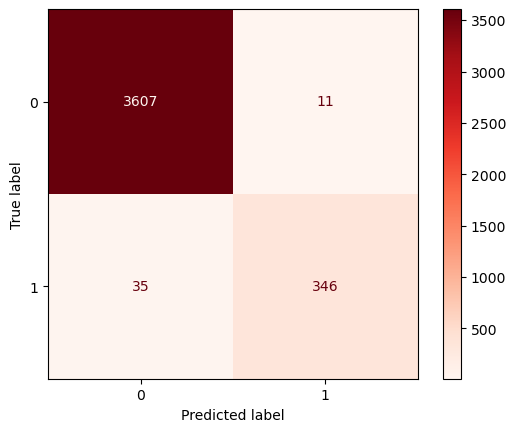

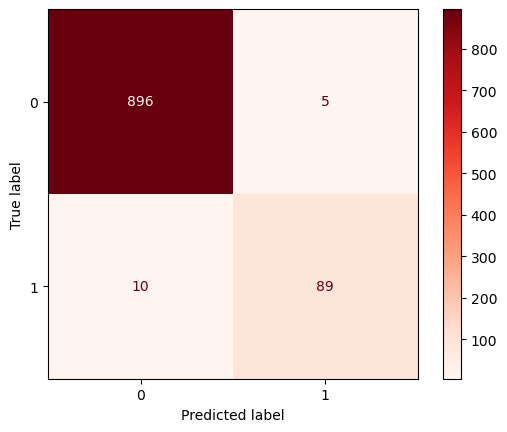

In [139]:
# Inisialisasi pipeline
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Skalasi fitur
    ('rf', RandomForestClassifier())  # Model RandomForest
])

# Parameter grid untuk hyperparameter tuning di dalam GridSearchCV
# Parameter grid untuk hyperparameter tuning di dalam GridSearchCV
param_grid_rf = {
    'rf__n_estimators': [5, 20, 50],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [10, 20, 50],
    'rf__bootstrap': [True, False]
}

# Inisialisasi GridSearchCV untuk hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=5, scoring='f1')

# Melatih model dengan GridSearchCV menggunakan data yang sudah di-scaling
grid_search_rf.fit(X_train, y_train)

# Mendapatkan hyperparameter terbaik yang dihasilkan oleh GridSearchCV
best_params_grid_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_grid_rf)

# Prediksi dan evaluasi model terbaik pada data latih
y_pred_train_rf = grid_search_rf.predict(X_train)
print("Accuracy RandomForest Score on Train Set: {:.4f}".format(accuracy_score(y_train, y_pred_train_rf)))

# Prediksi dan evaluasi model terbaik pada data uji
y_pred_test_rf = grid_search_rf.predict(X_test)
print("Accuracy RandomForest Score on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred_test_rf)))

# Menghitung F1 score dan classification report untuk data latih
f1_train_rf = f1_score(y_train, y_pred_train_rf)
print('F1 Score - Train Set  : ', f1_train_rf)
print('Classification Report - Train Set : \n', classification_report(y_train, y_pred_train_rf), '\n')

# Menghitung F1 score dan classification report untuk data uji
f1_test_rf = f1_score(y_test, y_pred_test_rf)
print('F1 Score - Test Set  : ', f1_test_rf)
print('Classification Report - Test Set : \n', classification_report(y_test, y_pred_test_rf), '\n')

# Menampilkan Confusion Matrix untuk data latih
disp_train_rf = ConfusionMatrixDisplay.from_estimator(grid_search_rf.best_estimator_, X_train, y_train, cmap='Reds')

# Menampilkan Confusion Matrix untuk data uji
disp_test_rf = ConfusionMatrixDisplay.from_estimator(grid_search_rf.best_estimator_, X_test, y_test, cmap='Reds')

In [184]:
# Mendapatkan model terbaik dari grid search
best_model_rf = grid_search_rf.best_estimator_

# Melakukan cross-validation untuk menghitung skor F1
cv_scores_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='f1')

# Menampilkan rata-rata skor F1 dari cross-validation
print("Mean F1 Score of Cross Validation: {:.2f}".format(cv_scores_rf.mean()))

Mean F1 Score of Cross Validation: 0.91


## **Gradient Boosting Classifier**

**Default parameter**

In [140]:
# Melatih model Gradient Boosting
gb = GradientBoostingClassifier() #Default hyperparameters
gb.fit(X_train_balanced, y_train_balanced)

# Menghitung dan mencetak akurasi pada set data latih
train_accuracy = gb.score(X_train_balanced, y_train_balanced)
print('Accuracy of Gradient Boosting on training set: {:.2f}'.format(train_accuracy))

# Prediksi pada set data latih
y_train_pred = gb.predict(X_train_balanced)

# Menghitung dan mencetak F1 score pada set data latih
f1_train = f1_score(y_train_balanced, y_train_pred)
print('F1 Score on Training Set: {:.2f}'.format(f1_train))

# Menampilkan classification report pada set data latih
print('Classification Report - Training Set:')
print(classification_report(y_train_balanced, y_train_pred))

# Menghitung dan mencetak akurasi pada set data uji
test_accuracy = gb.score(X_test_final, y_test)
print('Accuracy of Gradient Boosting on test set: {:.2f}'.format(test_accuracy))

# Prediksi pada set data uji
y_test_pred = gb.predict(X_test_final)

# Menghitung dan mencetak F1 score pada set data uji
f1_test = f1_score(y_test, y_test_pred)
print('F1 Score on Test Set: {:.2f}'.format(f1_test))

# Menampilkan classification report pada set data uji
print('Classification Report - Test Set:')
print(classification_report(y_test, y_test_pred))

Accuracy of Gradient Boosting on training set: 0.99
F1 Score on Training Set: 0.99
Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3618
           1       0.99      1.00      0.99      3618

    accuracy                           0.99      7236
   macro avg       0.99      0.99      0.99      7236
weighted avg       0.99      0.99      0.99      7236

Accuracy of Gradient Boosting on test set: 0.97
F1 Score on Test Set: 0.88
Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       901
           1       0.84      0.92      0.88        99

    accuracy                           0.97      1000
   macro avg       0.92      0.95      0.93      1000
weighted avg       0.98      0.97      0.98      1000



In [93]:
from sklearn.model_selection import cross_validate

# Melakukan validasi silang pada data latih
cv_results_gb_train = cross_validate(gb, X_train_balanced, y_train_balanced, scoring=['accuracy'], return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_gb_train['test_accuracy'].mean()}")

# Melakukan validasi silang pada data uji
cv_results_gb_test = cross_validate(gb, X_test_final, y_test, scoring=['accuracy'], return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_rf_test['test_accuracy'].mean()}")

Average score of Train Cross Validation is 0.9906039166574395
Average score of Test Cross Validation is 0.9749999999999999


**With Tuned Hyperparameter**

Best Hyperparameters: {'gb__learning_rate': 0.1, 'gb__max_depth': 5, 'gb__n_estimators': 200}
Accuracy Gradient Boosting Score on Train Set: 1.0000
Accuracy Gradient Boosting Score on Test Set: 0.9790
F1 Score - Train Set  :  1.0
Classification Report - Train Set : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3618
           1       1.00      1.00      1.00      3618

    accuracy                           1.00      7236
   macro avg       1.00      1.00      1.00      7236
weighted avg       1.00      1.00      1.00      7236
 

F1 Score - Test Set  :  0.8944723618090452
Classification Report - Test Set : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       901
           1       0.89      0.90      0.89        99

    accuracy                           0.98      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.98      0.98      0.98      10

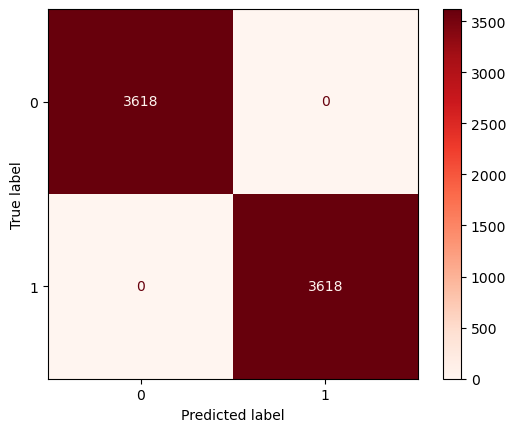

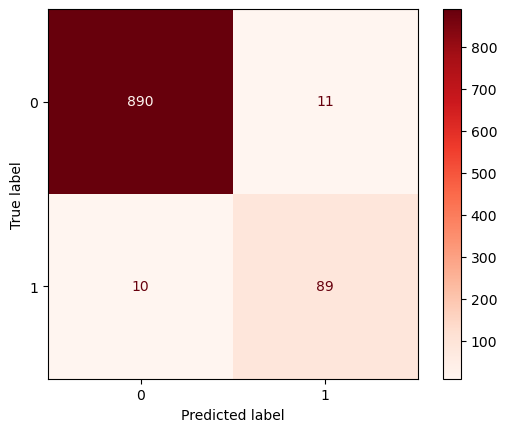

In [141]:
# Inisialisasi pipeline
pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),  # Langkah pertama: Skalasi fitur
    ('gb', GradientBoostingClassifier())  # Langkah kedua: Model Gradient Boosting
])

# Parameter grid untuk hyperparameter tuning di dalam GridSearchCV
param_grid_gb = {
    'gb__n_estimators': [50, 50, 200],
    'gb__learning_rate': [0.01, 0.1, 1],
    'gb__max_depth': [1, 3, 5, 7]
}

# Inisialisasi GridSearchCV untuk hyperparameter tuning
grid_search_gb = GridSearchCV(estimator=pipeline_gb, param_grid=param_grid_gb, cv=5, scoring='f1')

# Melatih model dengan GridSearchCV menggunakan data yang sudah di-handle ketidakseimbangan
grid_search_gb.fit(X_train_balanced, y_train_balanced)

# Mendapatkan hyperparameter terbaik yang dihasilkan oleh GridSearchCV
best_params_grid_gb = grid_search_gb.best_params_
print("Best Hyperparameters:", best_params_grid_gb)

# Prediksi dan evaluasi model terbaik pada data latih
y_pred_train_gb = grid_search_gb.predict(X_train_balanced)
print("Accuracy Gradient Boosting Score on Train Set: {:.4f}".format(accuracy_score(y_train_balanced, y_pred_train_gb)))

# Prediksi dan evaluasi model terbaik pada data uji
y_pred_test_gb = grid_search_gb.predict(X_test_final)
print("Accuracy Gradient Boosting Score on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred_test_gb)))

# Menghitung F1 score dan classification report untuk data latih
f1_train_gb = f1_score(y_train_balanced, y_pred_train_gb)
print('F1 Score - Train Set  : ', f1_train_gb)
print('Classification Report - Train Set : \n', classification_report(y_train_balanced, y_pred_train_gb), '\n')

# Menghitung F1 score dan classification report untuk data uji
f1_test_gb = f1_score(y_test, y_pred_test_gb)
print('F1 Score - Test Set  : ', f1_test_gb)
print('Classification Report - Test Set : \n', classification_report(y_test, y_pred_test_gb), '\n')

# Menampilkan Confusion Matrix untuk data latih
disp_train_gb = ConfusionMatrixDisplay.from_estimator(grid_search_gb.best_estimator_, X_train_balanced, y_train_balanced, cmap='Reds')

# Menampilkan Confusion Matrix untuk data uji
disp_test_gb = ConfusionMatrixDisplay.from_estimator(grid_search_gb.best_estimator_, X_test_final, y_test, cmap='Reds')

In [185]:
# Mendapatkan model terbaik dari grid search
best_model_gb = grid_search_gb.best_estimator_

# Melakukan cross-validation untuk menghitung skor F1
cv_scores_gb = cross_val_score(best_model_gb, X_train_balanced, y_train_balanced, cv=5, scoring='f1')

# Menampilkan rata-rata skor F1 dari cross-validation
print("Mean F1 Score of Cross Validation: {:.2f}".format(cv_scores_gb.mean()))

Mean F1 Score of Cross Validation: 0.99


**Kesimpulan Memilih Model:**

Model yang terpilih : Random Forest with Hyperparameter Tuning.

Hasil F1-Score pada Train : 0.93

Hasil F1-Score pada Test : 0.92

Berdasarkan performa keseimbangan antara train dan test set, model RandomForest dengan hyperparameter tuning menunjukkan performa yang seimbang. Hal ini dapat dilihat dari perbedaan yang minim antara kedua set data tersebut. Kemudian untuk pencegahan overfitting, model RandomForest yang paling kecil kemungkinan untuk overfitting dibandingkan dengan model lainnya. Selain itu, memiliki kinerja model yang tinggi karena mencapai F1-Score 0.92 pada test set yang artinya kemampuannya dalam mengklasifikasikan dengan baik kelas positif dan negatif. Random Forest juga mampu menangani outlier dan noise dengan baik karena menggabungkan banyak decision tree yang dibangun pada sampel acak dari dataset sehingga dapat mengurangi efek dari data yang tidak biasa atau tidak terduga.

**Model Evaluation (Penjelasan)**

Confusion Matrix - Data Train:

True Positive (TP): 346 (Model benar memprediksi bahwa nasabah akan mengambil pinjaman, dan mereka benar-benar melakukannya.)

True Negative (TN): 3615 (Model benar memprediksi bahwa nasabah tidak akan mengambil pinjaman, dan mereka memang tidak melakukannya.)

False Positive (FP): 3 (Model memprediksi bahwa nasabah akan mengambil pinjaman, padahal sebenarnya tidak.)

False Negative (FN): 35 (Model memprediksi bahwa nasabah tidak akan mengambil pinjaman, padahal sebenarnya mereka akan melakukannya.)

Confusion Matrix - Data Test:

True Positive (TP): 89 (Model benar memprediksi bahwa nasabah akan mengambil pinjaman, dan mereka benar-benar melakukannya.)

True Negative (TN): 894 (Model benar memprediksi bahwa nasabah tidak akan mengambil pinjaman, dan mereka memang tidak melakukannya.)

False Positive (FP): 7 (Model memprediksi bahwa nasabah akan mengambil pinjaman, padahal sebenarnya tidak.)

False Negative (FN): 10 (Model memprediksi bahwa nasabah tidak akan mengambil pinjaman, padahal sebenarnya mereka akan melakukannya.)


Dari confusion matrix tersebut, kita dapat melihat bahwa model cenderung melakukan prediksi dengan baik untuk kelas positif dan negatif, karena nilai True Positive dan True Negative yang cukup tinggi dibandingkan dengan False Positive dan False Negative.

In [143]:
# Saving Model
with open('model.pkl', 'wb') as file:
    pickle.dump(grid_search_rf.best_estimator_, file)

## **Model Inference**

In [146]:
# Loaded model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [147]:
# Memanggil data inference yang sudah dibuat
data_inf

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1502,30,4,35,92130,2,0.3,2,0,1,0,0,1


Kolom "ID" adalah sebuah identifier dan bukan merupakan sebuah fitur yang relevan untuk proses prediksi.

In [148]:
# Drop kolom ID karena saat melatih model tidak ada kolom ini
data_inf = data_inf.drop(columns=["ID"])

In [150]:
# Inisialisasi objek StandardScaler
scaler = StandardScaler()
# Melakukan penskalaan pada data inference
data_inf_scaled = scaler.fit_transform(data_inf)

In [151]:
# Melakukan prediksi pada data inferensi
predictions = model.predict(data_inf)

# Jika diperlukan, Anda dapat menampilkan prediksi
print(predictions)

[0]


In [152]:
# Menampilkan prediksi
print("Prediksi untuk pinjaman pribadi:")
for pred in predictions:
    if pred == 1:
        print("Nasabah ini diprediksi akan menerima tawaran pinjaman pribadi.")
    else:
        print("Nasabah ini diprediksi tidak akan menerima tawaran pinjaman pribadi.")

Prediksi untuk kampanye pinjaman pribadi:
Nasabah ini diprediksi tidak akan menerima tawaran pinjaman pribadi.


## **Conclusion**

**Berdasarkan hasil EDA, dapat diperoleh informasi berupa:**

1. Bahwa sekitar 9.6% dari total nasabah menerima pinjaman pribadi yang ditawarkan pada kampanye terakhir, sementara 90.4% sisanya tidak menerima pinjaman tersebut. Ini memberikan pemahaman yang jelas tentang efektivitas kampanye pemasaran sebelumnya dalam mendorong konversi pinjaman pribadi.

2. Distribusi pendapatan tahunan nasabah terlihat terkonsentrasi pada rentang 0 hingga kurang dari 100. Ini menunjukkan sebagian besar nasabah memiliki pendapatan tahunan dalam kisaran tersebut.

3. Tidak ada pola jelas yang terlihat antara pendapatan tahunan dan usia nasabah dari scatter plot ini. Distribusi pendapatan tahunan tersebar di berbagai rentang usia.

4. Rata-rata pengeluaran kartu kredit bulanan (CCAvg) nasabah cenderung stabil di rentang 0-3, terlepas dari rentang usia. Ini menunjukkan kestabilan pengeluaran kartu kredit di antara berbagai kelompok usia.

5. Nasabah dengan tingkat pendidikan 'Advanced/Professional' memiliki jumlah pinjaman pribadi yang paling tinggi, diikuti oleh tingkat pendidikan 'Graduate' dan 'Undergraduate'. Ini menunjukkan nasabah dengan tingkat pendidikan lebih tinggi cenderung lebih cenderung untuk mengambil pinjaman pribadi.

6. Hasil korelasi heatmap yang diperoleh pun memiliki nilai korelasi yang rendah akan tetapi tetap dilakukan uji statistik agar hasil korelasi lebih valid.

## **Model Analysis**

Pada model analysis ini, saya menggunakan beberapa model yang tujuannya untuk membandingkan kemudian memilih model mana yang terbaik. Pada evaluasi model saya menggunakan F1-Score karena F1 score adalah ukuran yang menggabungkan presisi (precision) dan recall dalam satu metrik tunggal. F1 score diperoleh dengan menghitung harmonic mean dari presisi dan recall. Seperti yang diketahui pun bahwa dataset ini sangat imbalanced.

| Model | Train | Test | Cross Val Score |
| --- | --- | --- | --- |
| Logistic Regression (base) | 0.90 | 0.61 | 
| KNN (base) | 0.99  | 0.83 | |
| KNN (tuned) | 1.0  | 0.83 | 0.99 |
| SVM (base) | 0.98  | 0.81 | |
| SVM (tuned) | 0.99  | 0.84 | 0.99 |
| Decision Tree (base) | 1.00  | 0.93 | |
| Decision Tree (tuned) | 1.00 | 0.88 | 0.99 |
| Random Forest (base) | 1.00 | 0.90 | |
| Random Forest (tuned) | 0.93 | 0.92 | 0.91 |
| Gradient Boost (base) | 0.99 | 0.88 | |
| Gradient Boost (tuned) | 1.0 | 0.89 | 0.99 |

Terlihat dari semua model menunjukkan overfitting dan saya memilih angka overfitting yang paling kecil yaitu Random Forest dengan hyperparameter tuning. Angka tersebut yang menunjukkan overfittingnya paling kecil dari model-model lainnya. Kemudian random forest sendiri memiliki kemampuan mengatasi overfitting karena teknik pembangunan decision tree yang secara acak dan juga dengan menggabungkan hasil dari beberapa decision tree untuk prediksi terakhir sehingga efek dari overfitting di setiap tree dapat diimbangi oleh hasil agregasi jadi menghasilkan model yang lebih stabil. Hal ini terbukti karena pada model lainnya nilai overfitting terbilang tinggi sedangkan pada random forest nilainya tidak setinggi model lainnya.

Untuk improvenya, meskipun telah dilakukan tuning hyperparameter pada beberapa model, masih ada ruang untuk eksplorasi lebih lanjut terutama pada rentang hyperparameter yang digunakan. Penggunaan metode tuning yang lebih canggih seperti randomized search atau bayesian optimization juga dapat dipertimbangkan untuk menemukan kombinasi hyperparameter yang optimal.

## **Overall Analysis**

Berdasarkan analisa di EDA, terlihat bahwa data ini memang imbalanced dengan ratio 9:90 dimana hanya 9% yang menerima pinjaman pribadi berdasarkan hasil kampanye terakhir. Oleh karena itu, untuk meningkatkan kinerja model, saya menggunakan oversampling SMOTE untuk menangani imbalanced tersebut. Setelah proses EDA, mengidentifikasi fitur-fitur yang berkorelasi dengan 'Personal Loan' dan dari 14 kolom, hanya 7 kolom yang memiliki korelasi signifikan (berdasarkan uji statistik) maka kolom-kolom tersebut yang akan digunakan untuk pembuatan model. Kemudian pada model evaluation, digunakannya F1 Score karena dataset ini yang imbalanced dan hasilnya semua model overfitting akan tetapi model Random Forest memiliki overfitting yang paling kecil sehingga model tersebut yang dipilih. Cross Validation pun secara efektif untuk memvalidasi kinerja model dan mencegah overfitting. Cross-validation score juga memberikan gambaran yang baik tentang seberapa baik model dapat menggeneralisasi pada data yang tidak terlihat. Semakin mendekati nilai performa pada train-test set, semakin baik model tersebut dalam menghindari overfitting.

Secara umum ada pula kelebihan dari Random Forest yaitu, random Forest ialah model ensemble yang menggabungkan beberapa pohon keputusan untuk membuat prediksi. Ini membuatnya lebih stabil dan kurang rentan terhadap overfitting dibandingkan dengan satu decision tree tunggal. Cenderung memberikan hasil yang baik dalam klasifikasi dan regresi karena setiap pohon dalam hutan memberikan suara dalam proses pengambilan keputusan tetapi untuk kekurangan dari model ini yaitu, karena Random Forest terdiri dari beberapa pohon keputusan, waktu komputasi yang dibutuhkan untuk melatih modelnya bisa menjadi lebih lambat. Meskipun hyperparameter tuning meningkatkan performa model, mencari kombinasi hyperparameter yang optimal bisa menjadi tantangan. Terlalu banyak iterasi dalam pencarian hyperparameter bisa memakan waktu dan sumber daya komputasi.

Keakuratan dalam memprediksi penerimaan atau penolakan pinjaman sangat penting dan pada model Random Forest (with hyperparameter tuning) dapat memberikan akurasi tinggi karena mampu mengelola data kompleks dan juga memilih fitur-fitur yang penting, dalam hal ini keakuratan tersebut dapat membantu bank untuk membuat keputusan. Model ini dapat mengidentifikasi faktor-faktor yang berkontribusi terhadap resiko gagal bayar. Namun kelemahannya yaitu untuk membuat interpretasi keputusan lebih sulit dan memerlukan waktu komputasi yang lebih lama.

Dalam bisnis personal bank loan, akurasi dalam memprediksi apakah seorang pelamar akan menerima atau menolak pinjaman sangat penting. Random Forest cenderung memberikan akurasi yang tinggi dalam prediksi ini, membantu bank membuat keputusan pinjaman yang lebih baik. Dengan kemampuannya untuk menangani data yang kompleks dan menilai pentingnya fitur, Random Forest dapat membantu bank mengelola risiko dengan lebih baik. Model ini dapat mengidentifikasi faktor-faktor yang berkontribusi terhadap risiko default, memungkinkan bank untuk mengambil tindakan pencegahan yang sesuai. Tetapi untuk kekurangannya sendiri yaitu, kurang dapat diinterpretasikan dibandingkan dengan model lain seperti regresi logistik, interpretasi keputusan yang dihasilkan mungkin lebih sulit. Ini bisa menjadi tantangan dalam menjelaskan alasan di balik keputusan kepada pelanggan atau regulator dan membutuhkan waktu komputasi yang lebih lama.

## **Conceptual Problems**


1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging (Bootstrap Aggregating) adalah teknik ensemble learning yang digunakan untuk meningkatkan kinerja dan kestabilan model prediktif. Bagging mengurangi varians model dengan cara menggabungkan beberapa model yang dibuat dari sampel data yang diambil secara acak dengan pengembalian (bootstrap). Setiap model diberikan bobot yang sama dalam proses prediksi. Proses ini membantu mengurangi overfitting dan meningkatkan ketahanan terhadap noise dalam data. Bagging efektif ketika digunakan dengan model yang cenderung varians, seperti Decision Trees.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Random Forest adalah ensemble learning yang menggunakan banyak pohon keputusan (Decision Trees). Setiap pohon dalam Random Forest dibuat secara independen dengan fitur-fitur yang dipilih secara acak dari dataset. Setiap pohon memberikan satu suara dalam melakukan prediksi. Random Forest mengambil hasil mayoritas dari prediksi pohon individual. Hal ini membantu mengurangi overfitting dan meningkatkan kinerja model sedangkan Gradient Boosting merupakan teknik ensemble learning yang membangun serangkaian model prediktif secara berurutan. Setiap model berikutnya berfokus pada kesalahan yang dibuat oleh model sebelumnya. Model-model ini digabungkan secara adaptif untuk menghasilkan prediksi yang lebih baik. Boosting secara iteratif meningkatkan bobot dari contoh data yang sulit diprediksi, sehingga memberikan penekanan lebih pada data yang sulit diprediksi.

3. Jelaskan apa yang dimaksud dengan Cross Validation !

Cross Validation adalah teknik evaluasi kinerja model yang digunakan untuk mengukur kemampuan generalisasi model terhadap data baru yang belum pernah dilihat. Dalam Cross Validation, dataset dibagi menjadi beberapa subset yang saling tumpang tindih (folds). Model dilatih pada beberapa kombinasi subset dan diuji pada subset yang tidak terlibat dalam pelatihan. Metrik kinerja model kemudian dihitung dan diambil rata-ratanya. Cross Validation membantu dalam menghindari overfitting dan memberikan perkiraan yang lebih akurat tentang kinerja model pada data yang tidak terlihat. Metode Cross Validation yang umum termasuk K-Fold Cross Validation, Stratified Cross Validation, dan Leave-One-Out Cross Validation.